# MFC dataset analysis

In [1]:
import os

os.listdir(os.getcwd())

['axis.ipynb',
 'finetune_bert.ipynb',
 'frameaxis-prepare.ipynb',
 'frame_words.json',
 'friss-base.ipynb',
 'friss-dict-extract.ipynb',
 'friss-frameaxis-dict-extract.ipynb',
 'friss-frameaxis-v2.ipynb',
 'friss-frameaxis.ipynb',
 'mfc-analysis.ipynb']

In [2]:
immigration_path = "../../data/mfc/immigration_labeled.json"
deathpenalty_path = "../../data/mfc/deathpenalty_labeled.json"
guncontrol_path = "../../data/mfc/guncontrol_labeled.json"
samesex_path = "../../data/mfc/samesex_labeled.json"
tobacco_path = "../../data/mfc/tobacco_labeled.json"
frames_code = "../../data/mfc/codes.json"

In [3]:
# read unlabeled data
import json

# read labeled data
with open(immigration_path) as f:
    immigration = json.load(f)

with open(deathpenalty_path) as f:
    deathpenalty = json.load(f)

with open(guncontrol_path) as f:
    guncontrol = json.load(f)

with open(samesex_path) as f:
    samesex = json.load(f)

with open(tobacco_path) as f:
    tobacco = json.load(f)

# read frames
with open(frames_code) as f:
    codes = json.load(f)


In [4]:
# generate statistics count
print("immigration data count: ", len(immigration))
print("deathpenalty data count: ", len(deathpenalty))
print("guncontrol data count: ", len(guncontrol))
print("samesex data count: ", len(samesex))
print("tobacco data count: ", len(tobacco))

immigration data count:  6757
deathpenalty data count:  6398
guncontrol data count:  6689
samesex data count:  10583
tobacco data count:  5274


In [5]:
def process_json(json_path, frames):
    # Load the JSON file
    with open(json_path) as f:
        labeled = json.load(f)
    
    # Loop through labeled data
    for idx, article in labeled.items():
        # Check for each annotator in the 'framing' section
        for annotator, annotations in article['annotations']['framing'].items():
            # Check if the annotator marked the segment as irrelevant
            if article['annotations']['irrelevant'].get(annotator, False):
                continue  # Skip this annotator if marked as irrelevant

            for annotation in annotations:
                # Extract the text corresponding to the annotation
                frame_text = article['text'][annotation['start']:annotation['end']]

                # Replace \n and other 
                frame_text = frame_text.replace("\n", " ").replace("\t", " ").replace("\r", " ")

                # make lower case
                frame_text = frame_text.lower()

                code_edited = int(str(annotation['code']).split(".")[0])

                # Add the extracted text to the frames dictionary
                if code_edited in frames:
                    frames[code_edited].append(frame_text)
                else:
                    frames[code_edited] = [frame_text]
    
    return frames

frames = {}

# Call the function for each JSON object
immigration_frames = process_json(immigration_path,frames)
deathpenalty_frames = process_json(deathpenalty_path, immigration_frames)
guncontrol_frames = process_json(guncontrol_path, deathpenalty_frames)
samesex_frames = process_json(samesex_path, guncontrol_frames)
tobacco_frames = process_json(tobacco_path, samesex_frames)

frames = immigration_frames

In [6]:
# print statistics
print("frame count: ", len(frames))

# print frame count
for code, texts in frames.items():
    print(codes[str(code) + ".0"], len(texts))

frame count:  15
Quality of Life 24505
Cultural Identity 34484
Legality, Constitutionality, Jurisdiction 101990
Other 3787
Political 93734
Morality 19030
Public Sentiment 29259
Capacity and Resources 4976
Economic 40263
Crime and Punishment 66432
Policy Prescription and Evaluation 50741
Health and Safety 33604
Fairness and Equality 17299
Security and Defense 18984
External Regulation and Reputation 5234


# Extract the adjectives from each text sequence

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 653.6 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 2.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.8 MB 2.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 3.0 MB

In [8]:
import spacy
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

doc = nlp("The war was harming the economy successfully.")

for token in doc:
    print(token.text, token.pos_, token.lemma_)

The DET the
war NOUN war
was AUX be
harming VERB harm
the DET the
economy NOUN economy
successfully ADV successfully
. PUNCT .


In [9]:
import spacy
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Assuming 'frames' is your existing dictionary with text sequences
frame_words = {}

counter = 0
for code, texts in frames.items():
    print(f"Processing code {code} ({counter + 1}/{len(frames)})")
    words_list = []
    for text in texts:
        # Process the text using spaCy
        doc = nlp(text)
        # Extract adjectives
        for token in doc:
            if token.pos_ == "ADJ":
                words_list.append(token.lemma_)
            elif token.pos_ == "NOUN":
                words_list.append(token.lemma_)
            elif token.pos_ == "VERB":
                words_list.append(token.lemma_)
            elif token.pos_ == "ADV":
                words_list.append(token.lemma_)

    # add all to 

    frame_words[code] = words_list

    counter += 1

Processing code 10 (1/15)


KeyboardInterrupt: 

In [36]:
# save frame words to json
import json

with open("frame_words.json", "w") as f:
    json.dump(frame_words, f)

In [9]:
import json

# Load the JSON file
with open("frame_words.json") as f:
    frame_words = json.load(f)

In [10]:
frame_words

{'10': ['primary',
  'immigrant',
  'hope',
  'need',
  'help',
  'enter',
  'college',
  'anxiety',
  'grip',
  'third',
  'period',
  'calculus',
  'class',
  'high',
  'school',
  'mount',
  'student',
  'go',
  'room',
  'tell',
  'go',
  'college',
  'qualify',
  'scholastically',
  'hope',
  'scholarship',
  'get',
  'immigration',
  'status',
  'ineligible',
  'most',
  'student',
  'loan',
  'pay',
  'own',
  'way',
  'lack',
  'social',
  'security',
  'number',
  'need',
  'work',
  'legally',
  'primary',
  'immigrant',
  'hope',
  'need',
  'help',
  'enter',
  'college',
  'anxiety',
  'grip',
  'third',
  'period',
  'calculus',
  'class',
  'high',
  'school',
  'mount',
  'student',
  'go',
  'room',
  'tell',
  'go',
  'college',
  'emory',
  'university',
  'say',
  'plan',
  'see',
  'get',
  'college',
  'situation',
  'recall',
  'recently',
  'though',
  'college',
  'seem',
  'reach',
  'month',
  'old',
  'parent',
  'break',
  'immigration',
  'law',
  'bring',

# Identify positive, negative and neutral adjectives

In [11]:
!pip install nltk afinn

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# Assuming 'frames_with_adjectives' is your existing dictionary with adjectives
frames_with_sentiments = {}

for code, words in frame_words.items():
    sentiment_dict = {'positive': [], 'negative': [], 'neutral': []}
    for word in words:
        # Get sentiment score
        sentiment_score = sia.polarity_scores(word)['compound']

        # Categorize the word based on the sentiment score
        if sentiment_score > 0.1:
            sentiment_dict['positive'].append(word)
        elif sentiment_score < -0.1:
            sentiment_dict['negative'].append(word)
        else:
            sentiment_dict['neutral'].append(word)

    frames_with_sentiments[code] = sentiment_dict


In [14]:
import math
from collections import Counter

# Calculate Term Frequency (TF)
tf = {}
for code, sentiments in frames_with_sentiments.items():
    tf[code] = {}
    for sentiment, words in sentiments.items():
        tf[code][sentiment] = Counter(words)

# Calculate Document Frequency (DF) for IDF calculation
df = Counter()
total_docs = 0
for code, sentiments in frames_with_sentiments.items():
    for sentiment, words in sentiments.items():
        total_docs += 1
        unique_words = set(words)
        df.update(unique_words)

# Calculate Inverse Document Frequency (IDF)
idf = {}
for word in df:
    idf[word] = math.log(total_docs / df[word])



In [34]:
from collections import Counter
import math

def calculate_tf_idf(tf):
    # Step 1: Calculate document frequency (DF) for each word within each sentiment
    df = {sentiment: Counter() for sentiment in next(iter(tf.values())).keys()}
    for key, sentiments in tf.items():
        for sentiment, words in sentiments.items():
            for word in words:
                df[sentiment][word] += 1

    
    num_docs = len(tf.keys())

    # Step 2: Calculate TF-IDF for each word in each sentiment category of each key
    tf_idf = {}
    for key, sentiments in tf.items():        
        tf_idf[key] = {}
        for sentiment, words in sentiments.items():
            word_count = sum(words.values())
            tf_idf[key][sentiment] = {}
            for word, count in words.items():
                tf = count / word_count
                idf = math.log(num_docs / df[sentiment][word])
                tf_idf[key][sentiment][word] = tf * idf

    return tf_idf

# Assuming 'tf' is your dictionary
tf_idf_result = calculate_tf_idf(tf)

In [35]:
tf_idf_result

{'10': {'positive': {'hope': 0.0,
   'help': 0.0,
   'security': 0.0,
   'legally': 0.0,
   'promise': 0.0,
   'await': 0.0,
   'admit': 0.00013930278751036448,
   'join': 0.0,
   'dream': 0.0,
   'great': 0.0,
   'value': 0.0,
   'powerful': 0.00010764306307619073,
   'grant': 0.0006775181028913181,
   'benefit': 0.0,
   'care': 0.0,
   'privilege': 0.0002889334214477617,
   'festival': 0.0002344097025357887,
   'legal': 0.0,
   'ease': 0.0001456347323971992,
   'good': 0.0,
   'escape': 0.0002722736301338942,
   'charity': 6.331944886834749e-05,
   'safety': 0.00017096251194453823,
   'accept': 0.0,
   'enjoy': 0.0011229003424447102,
   'comfortable': 0.0003020667587862963,
   'well': 0.0,
   'advanced': 0.0,
   'significant': 0.00014246875995378185,
   'rich': 0.0,
   'strong': 0.0,
   'amazing': 5.3821531538095363e-05,
   'like': 0.0005065555909467799,
   'holiday': 0.00012663889773669498,
   'friend': 0.0,
   'certain': 0.0,
   'chance': 0.0,
   'success': 0.0,
   'share': 0.00050

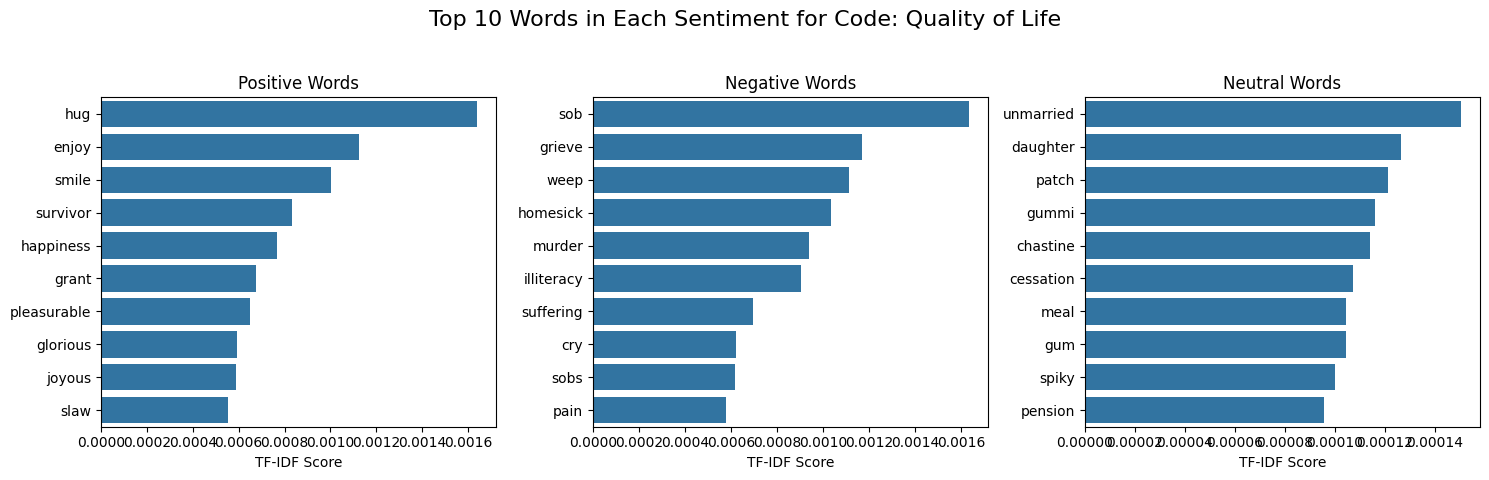

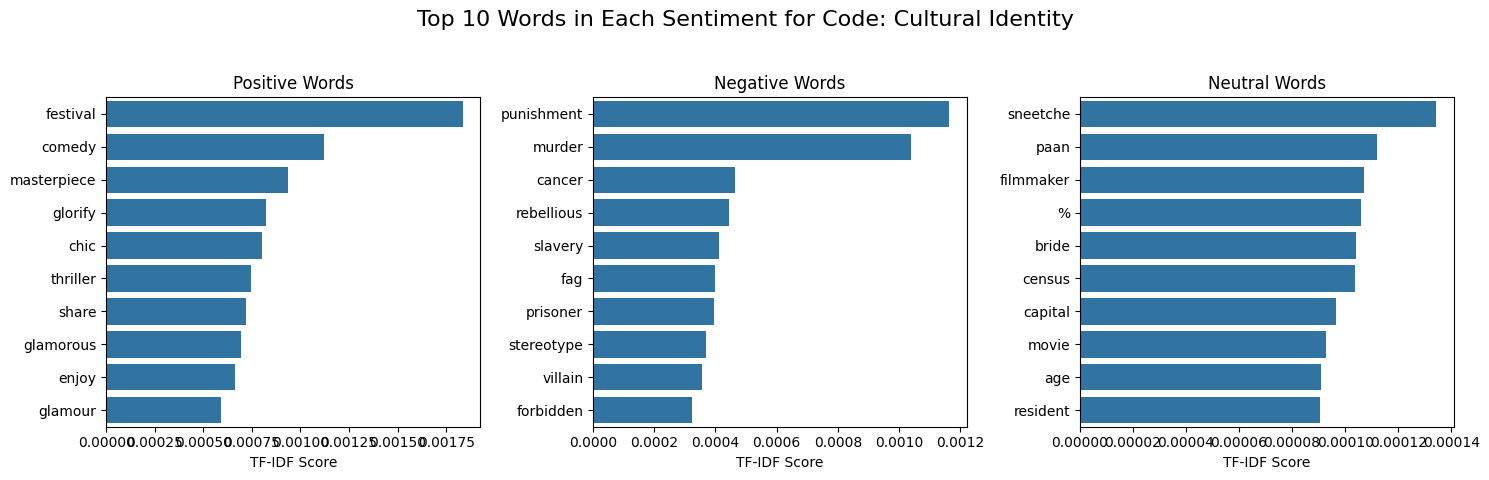

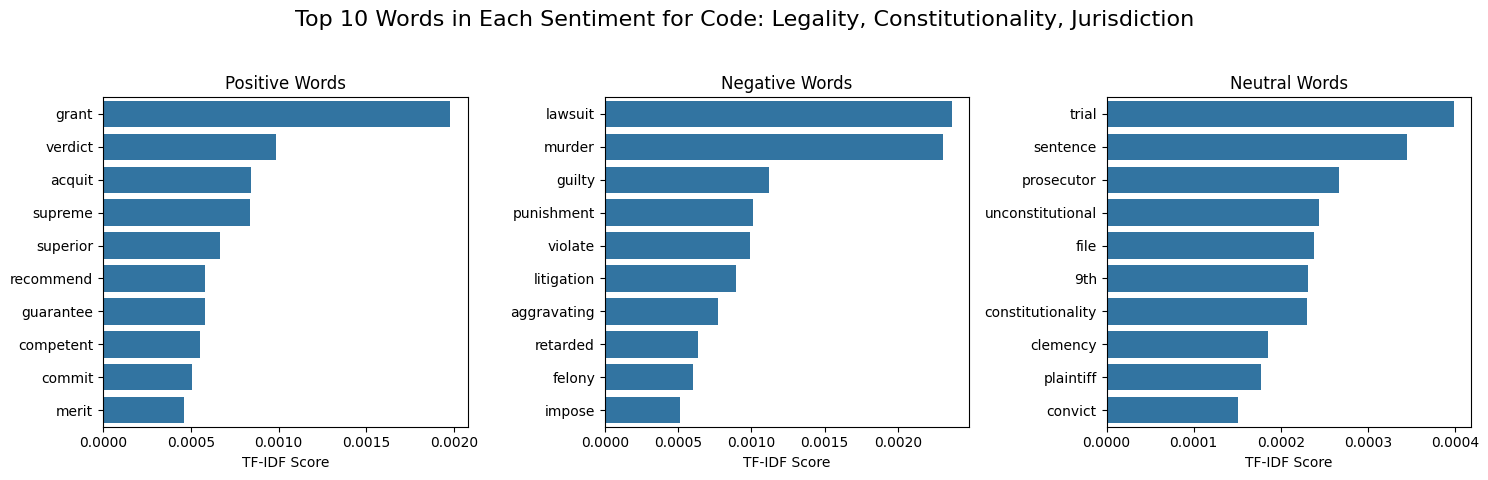

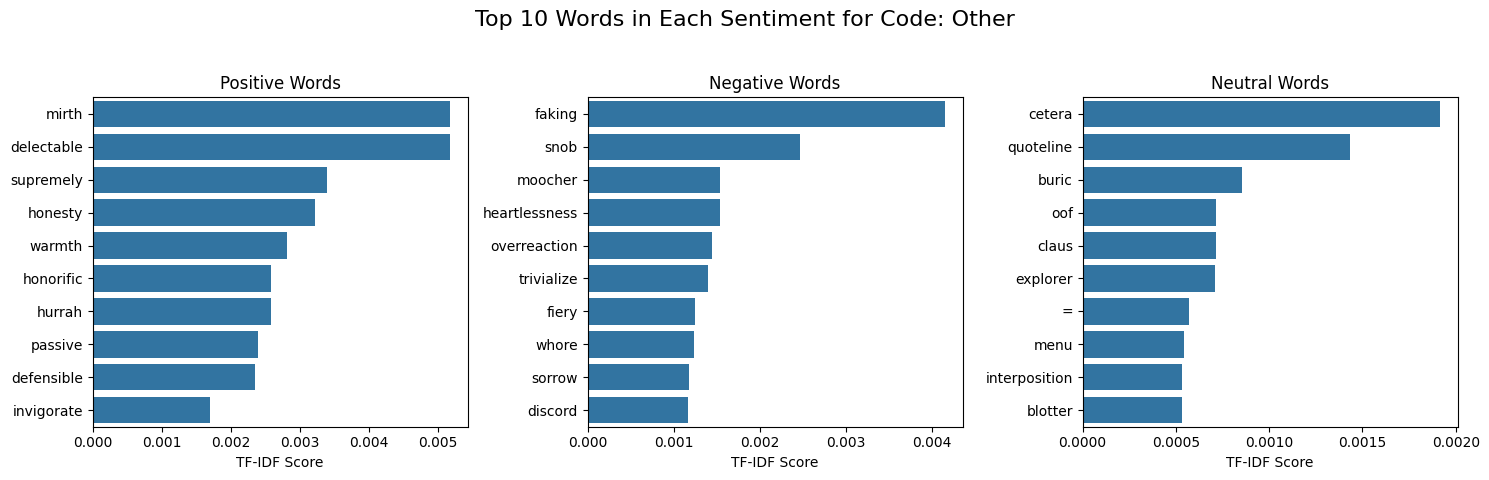

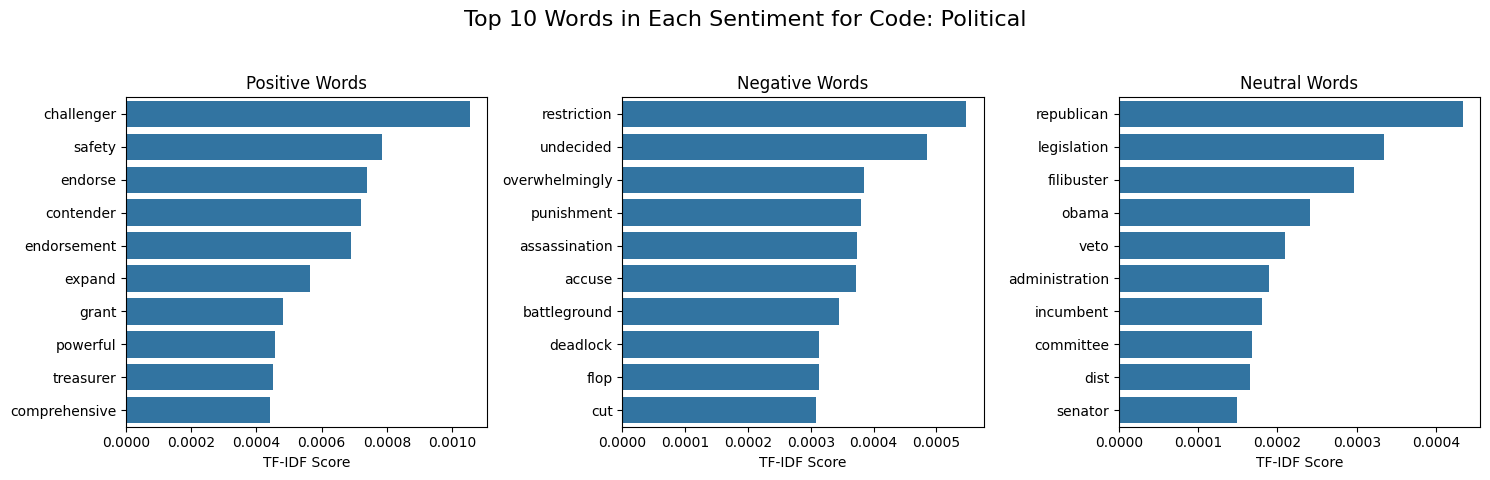

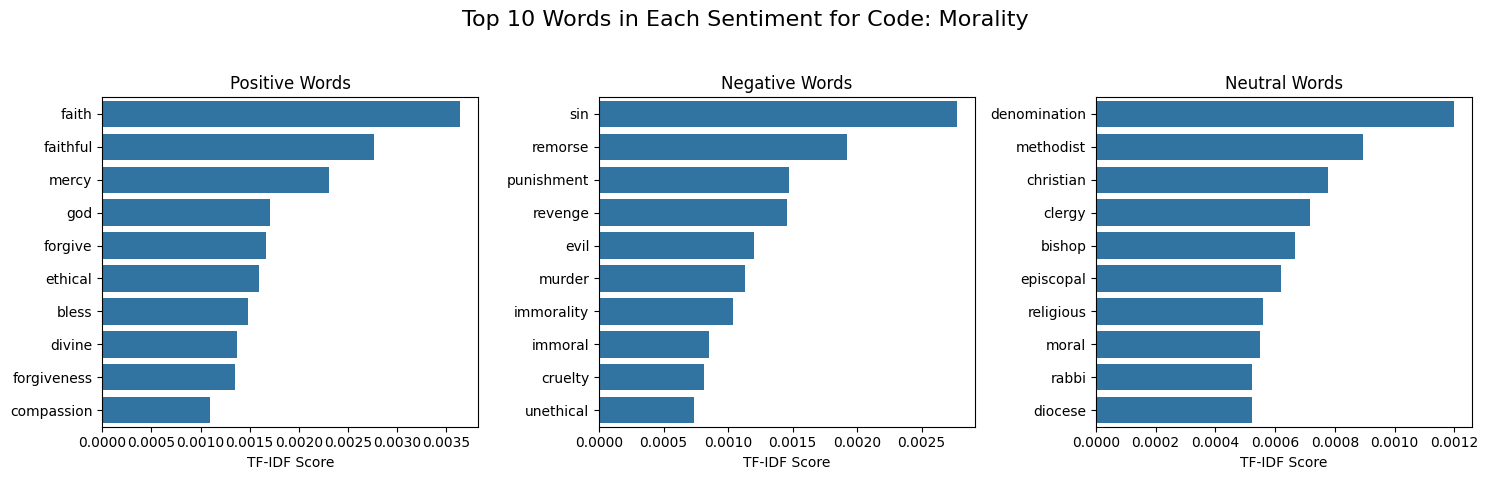

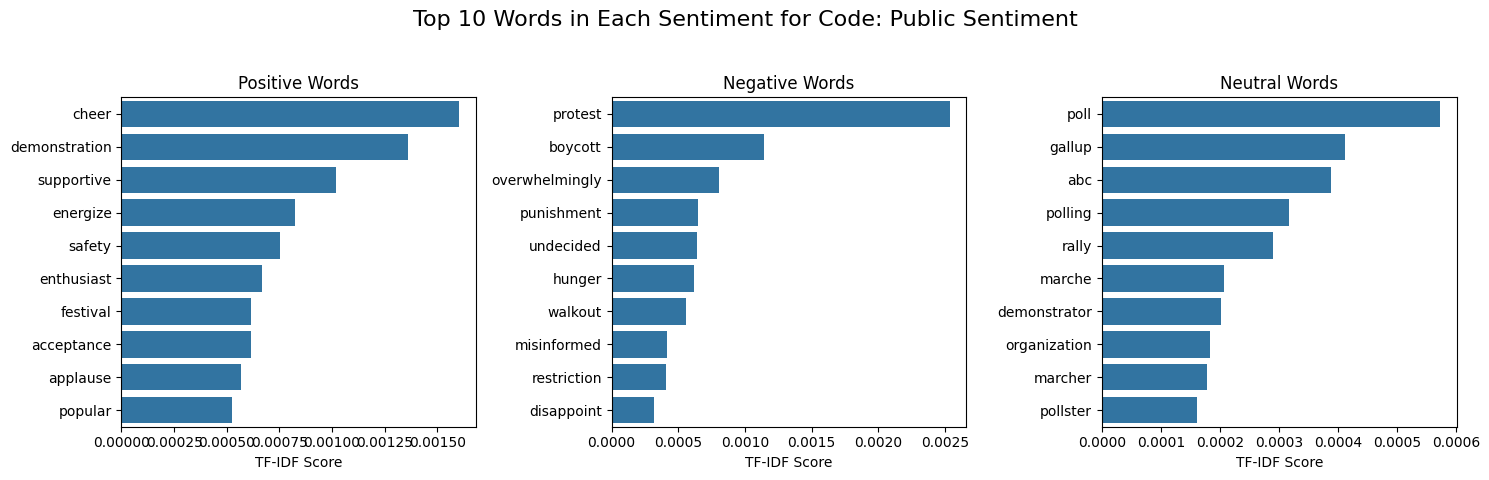

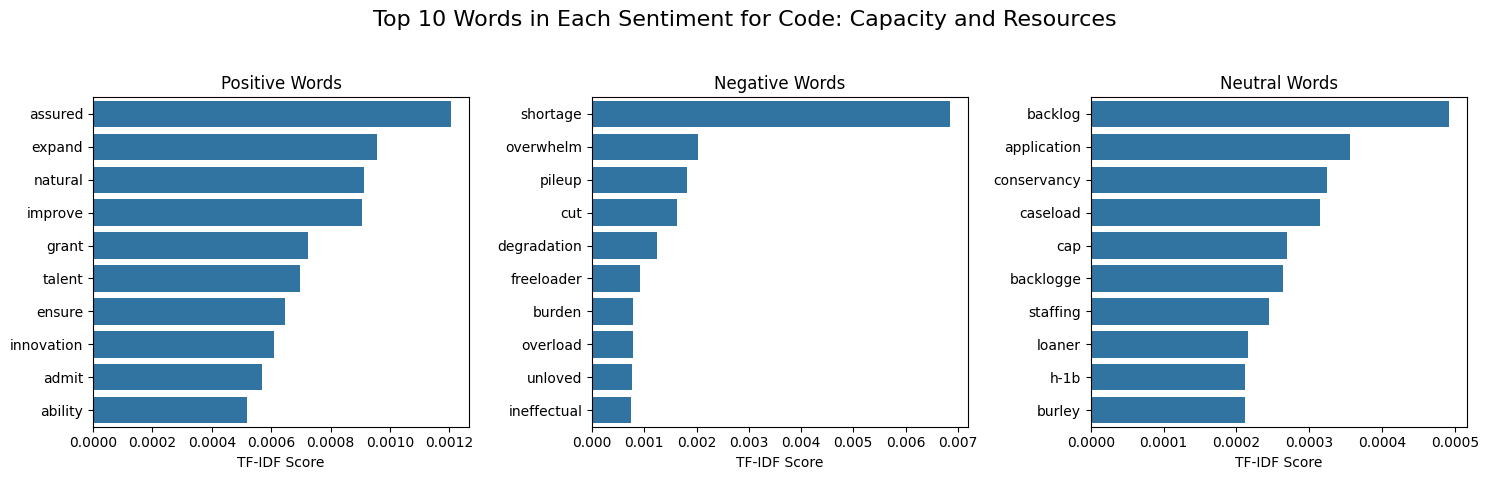

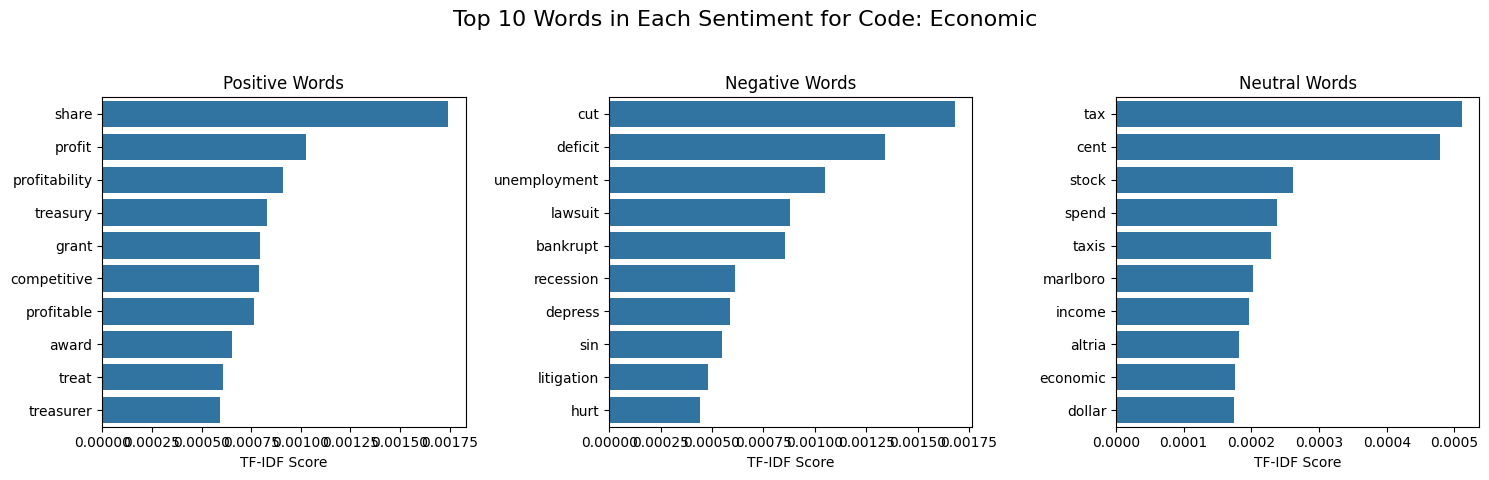

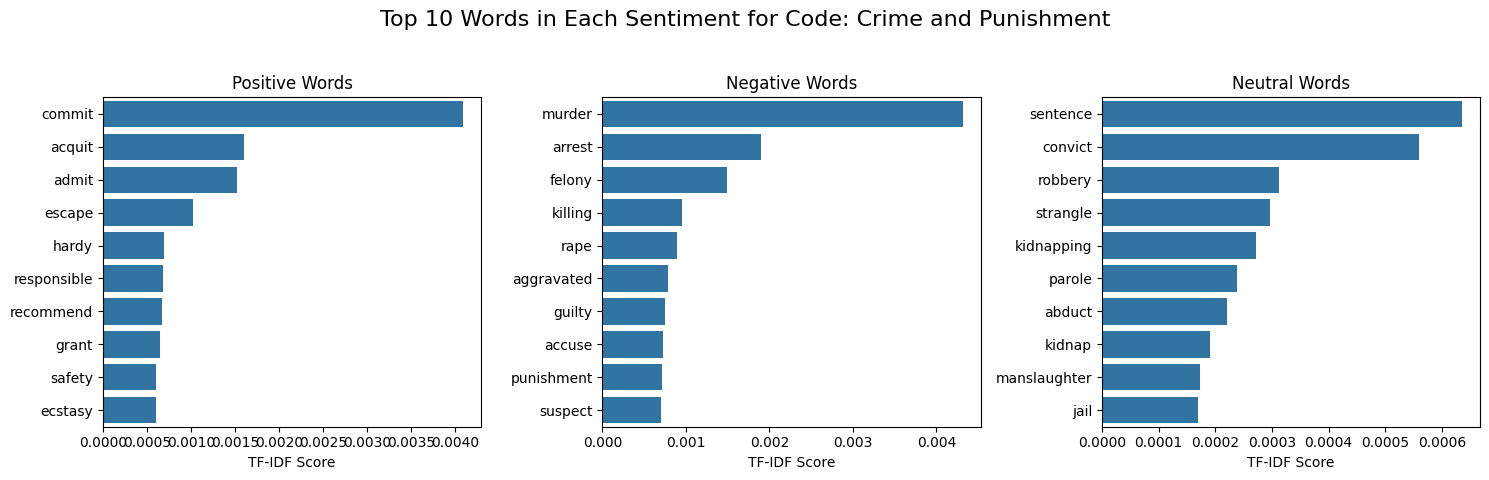

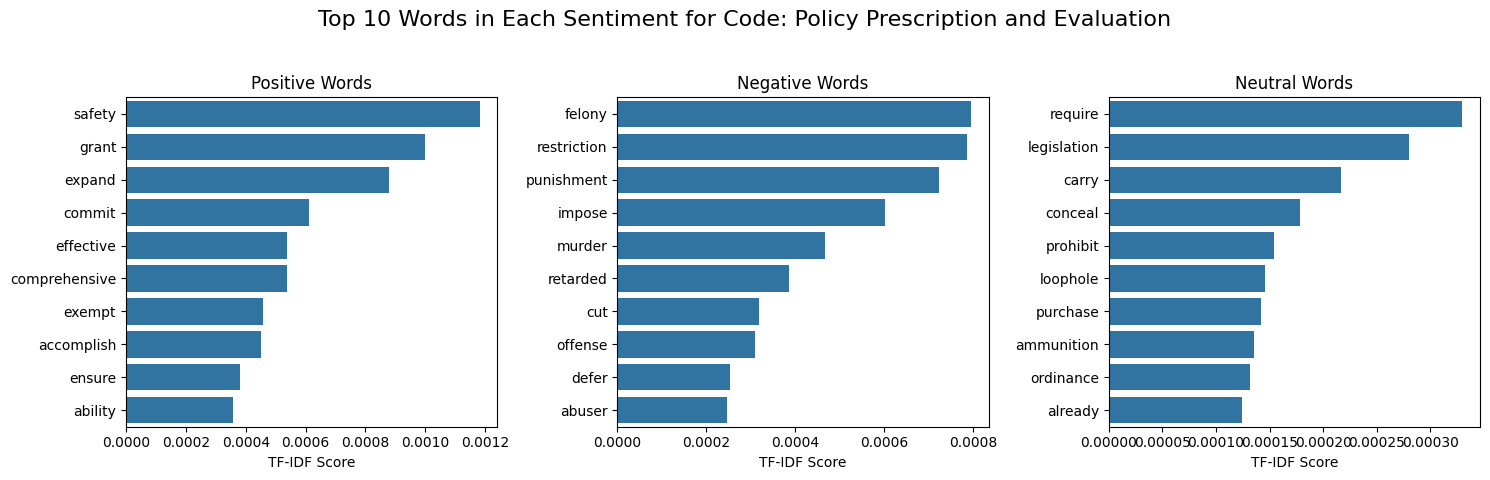

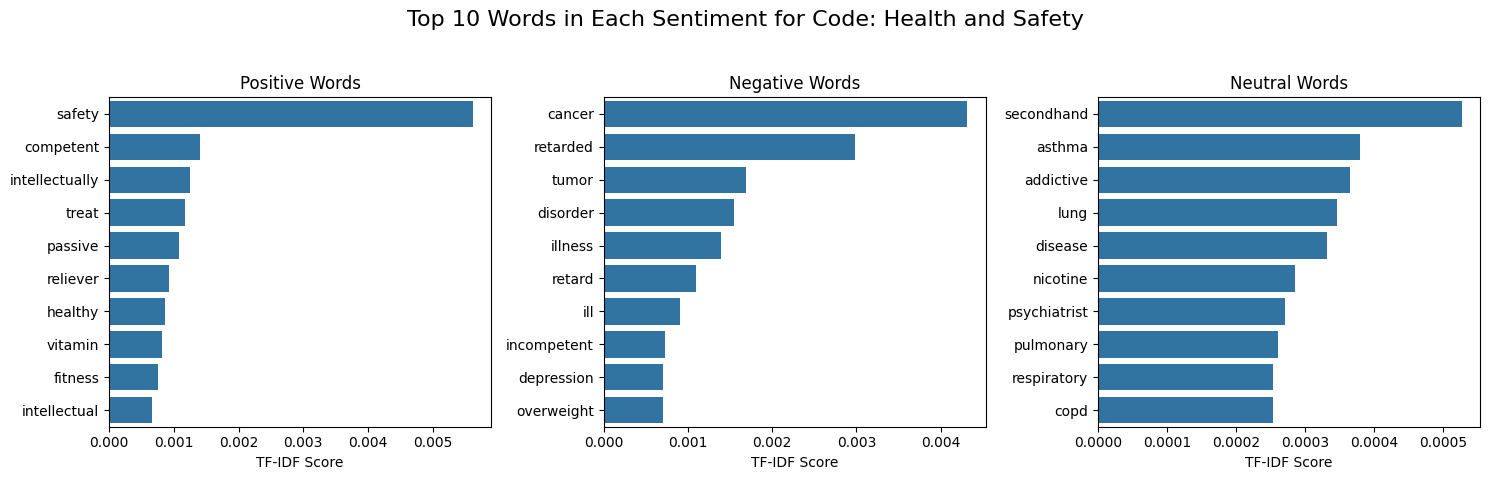

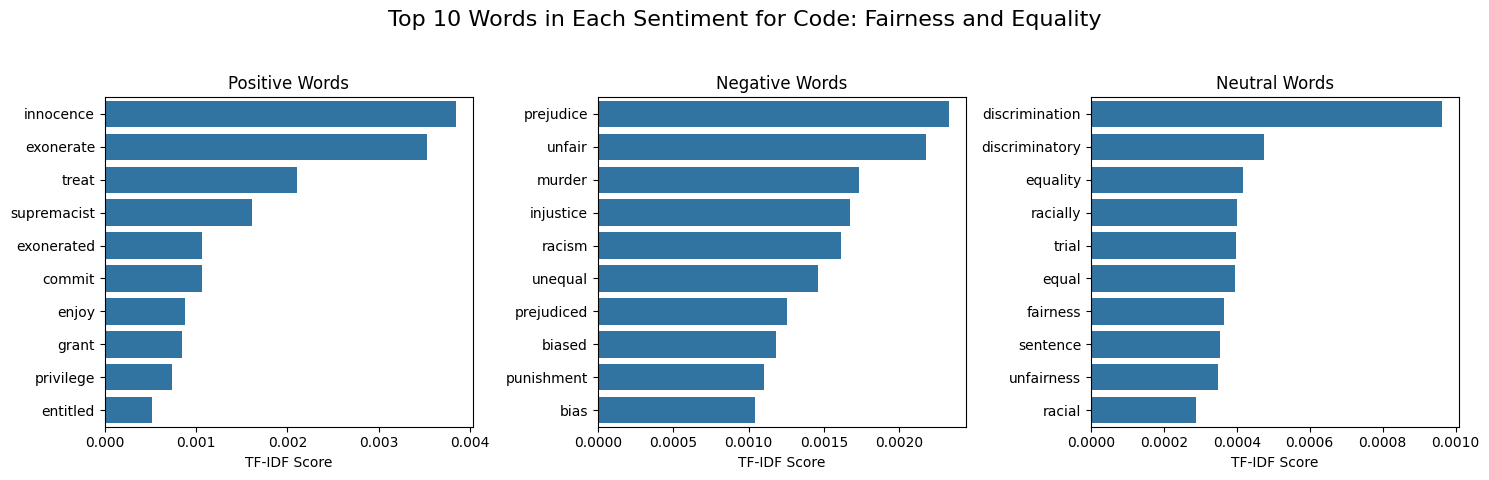

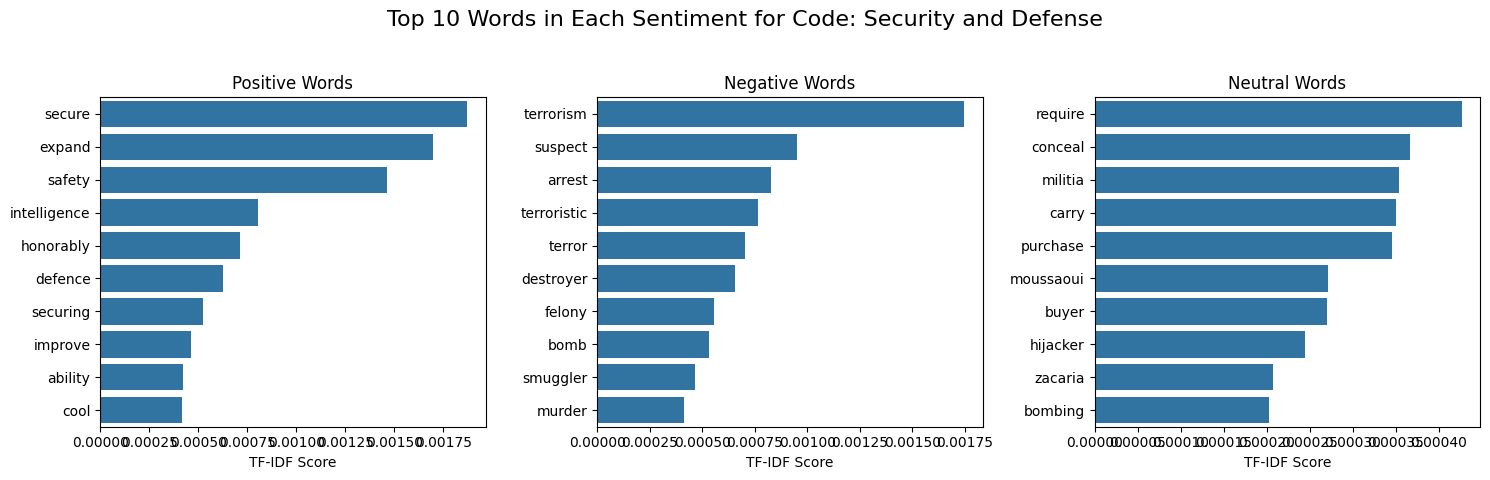

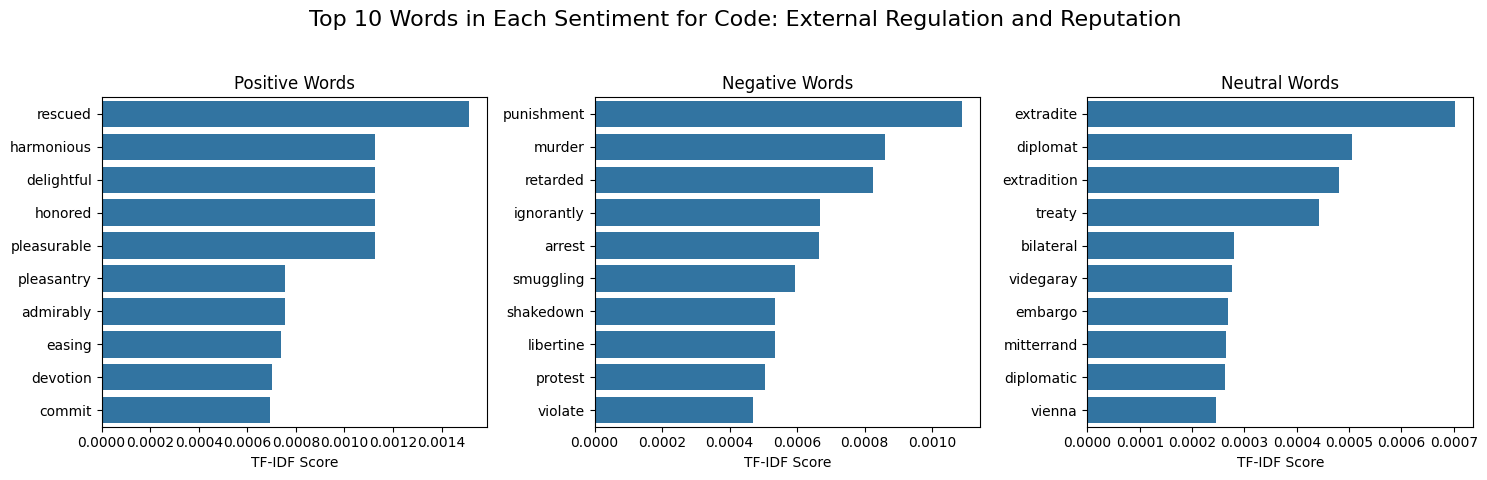

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_top_words(tf_idf_result, codes, N):
    for code, sentiments in tf_idf_result.items():
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        code_name = codes[str(code) + ".0"]
        fig.suptitle(f'Top {N} Words in Each Sentiment for Code: {code_name}', fontsize=16)

        for i, (sentiment, words) in enumerate(sentiments.items()):
            # Sort words by TF-IDF score and get top N words
            top_words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True)[:N])

            # Create DataFrame for easy plotting
            df = pd.DataFrame(list(top_words.items()), columns=['Word', 'TF-IDF Score'])
            
            # Plot
            sns.barplot(x='TF-IDF Score', y='Word', data=df, ax=axes[i])
            axes[i].set_title(f'{sentiment.capitalize()} Words')
            axes[i].set_xlabel('TF-IDF Score')
            axes[i].set_ylabel('')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_top_words(tf_idf_result, codes, 10)

In [42]:
# save tf_idf_result to json /data/axis/frames.json
import json

path = "../../data/axis/frames.json"

# save the top 20 words for each frame
def save_top_words(tf_idf_result, codes, N):
    frames = {}
    for code, sentiments in tf_idf_result.items():
        code_name = codes[str(code) + ".0"]
        frames[code_name] = {}
        for i, (sentiment, words) in enumerate(sentiments.items()):
            if sentiment == "neutral":
                continue

            # Sort words by TF-IDF score and get top N words
            top_words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True)[:N])
            
            # only save top words without tf-idf score
            top_words = list(top_words.keys())

            frames[code_name][sentiment] = top_words

    with open(path, "w") as f:
        json.dump(frames, f)

save_top_words(tf_idf_result, codes, 20)

# Plot

In [36]:
!pip install pandas matplotlib seaborn

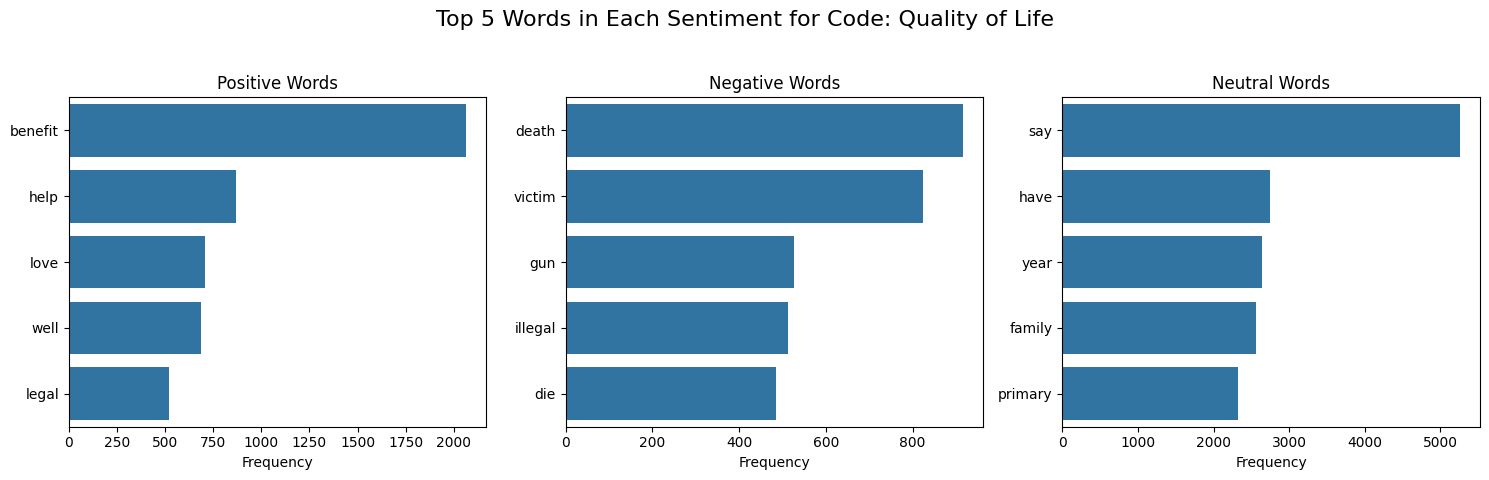

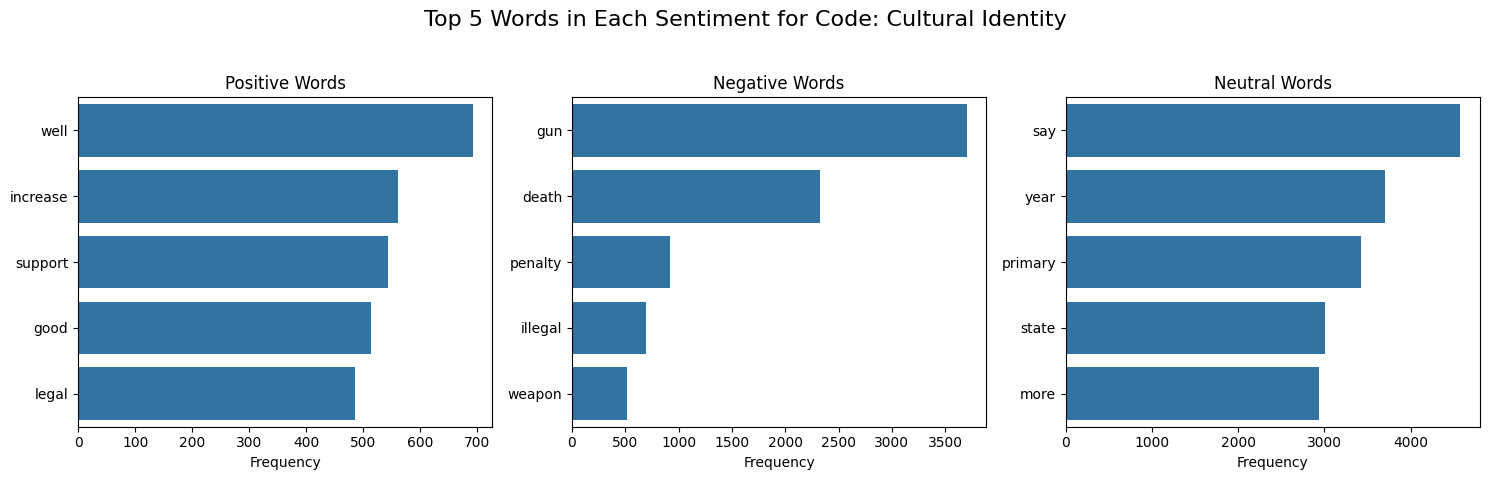

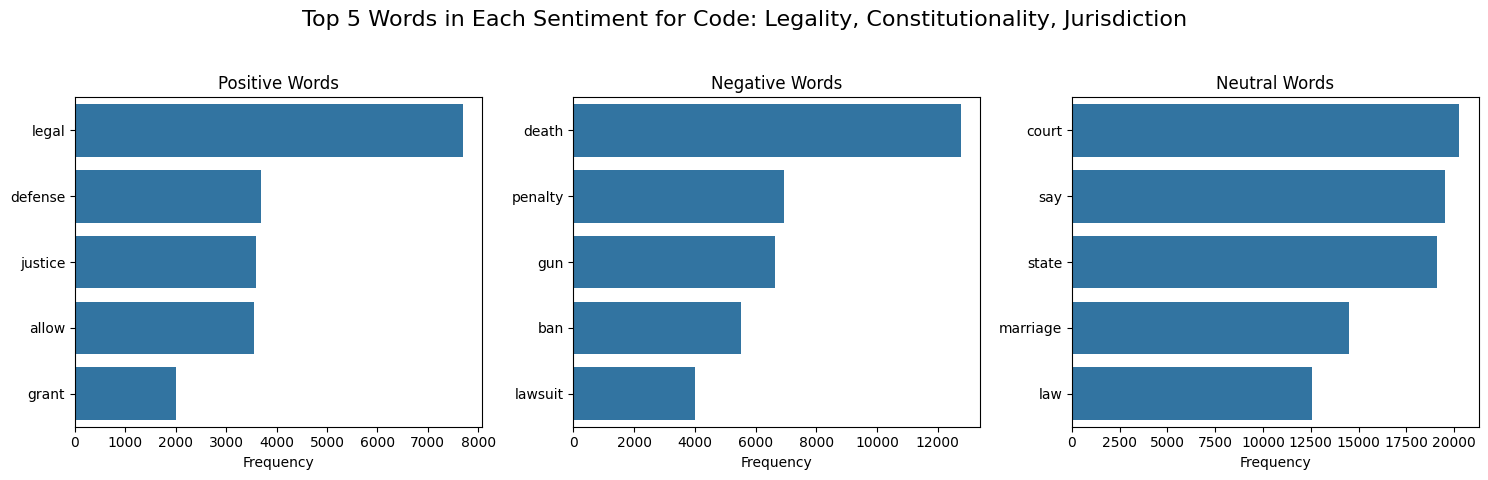

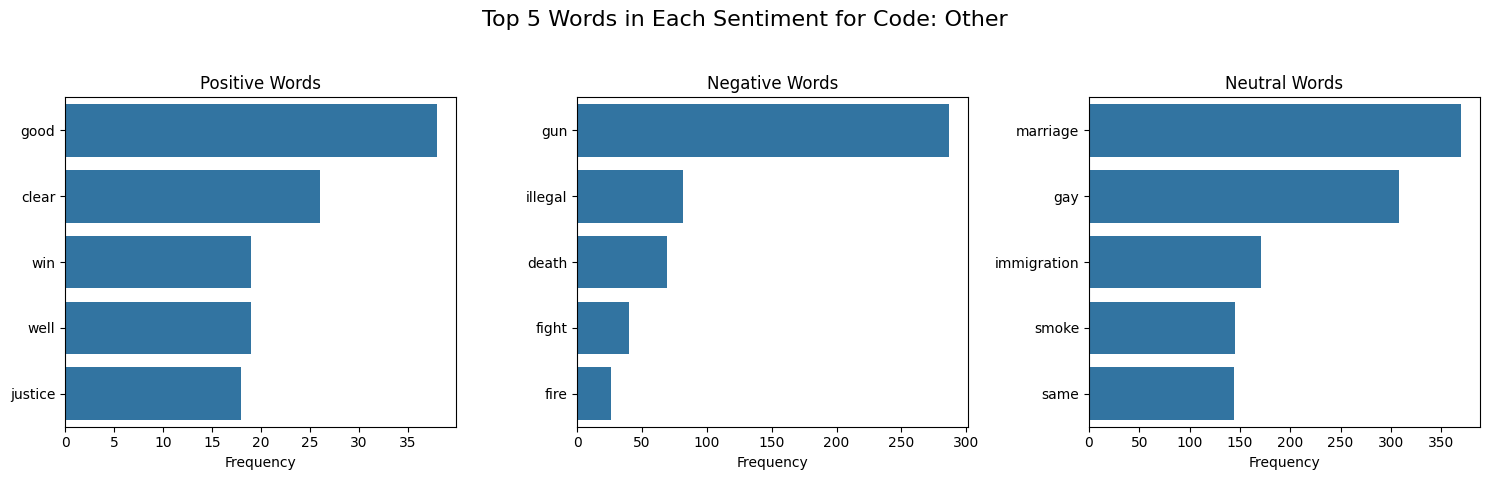

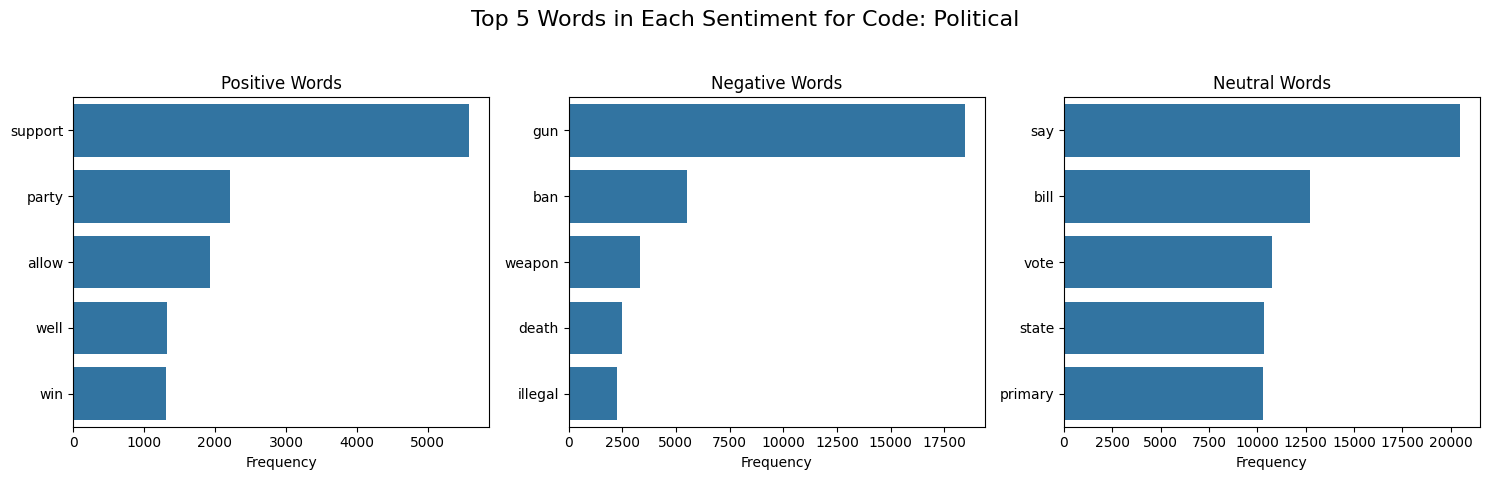

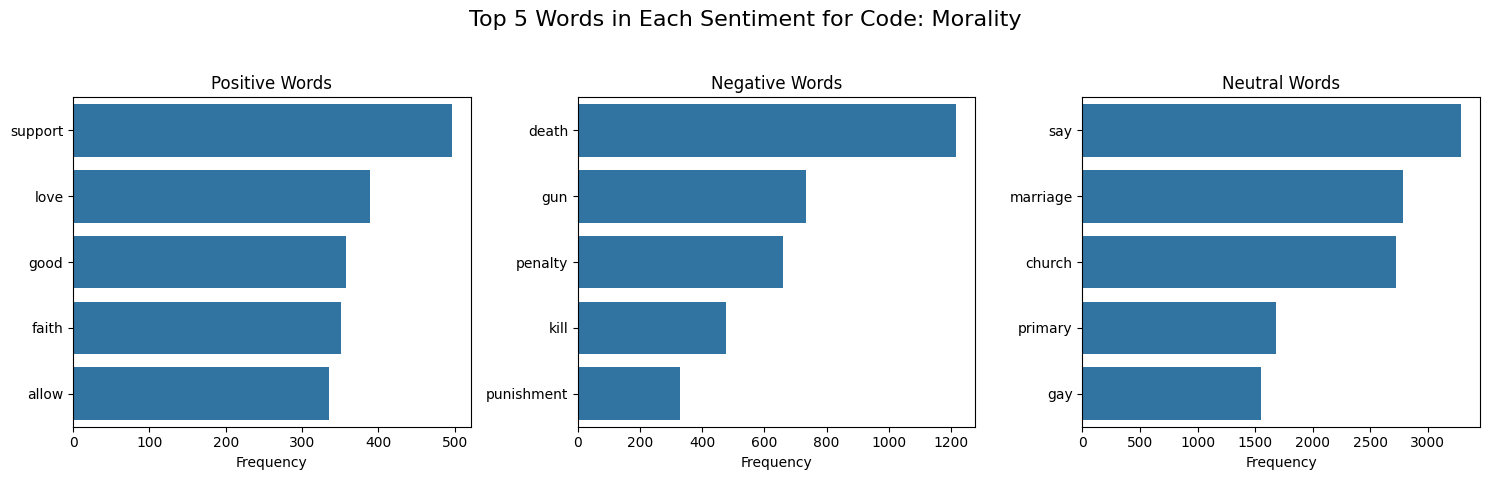

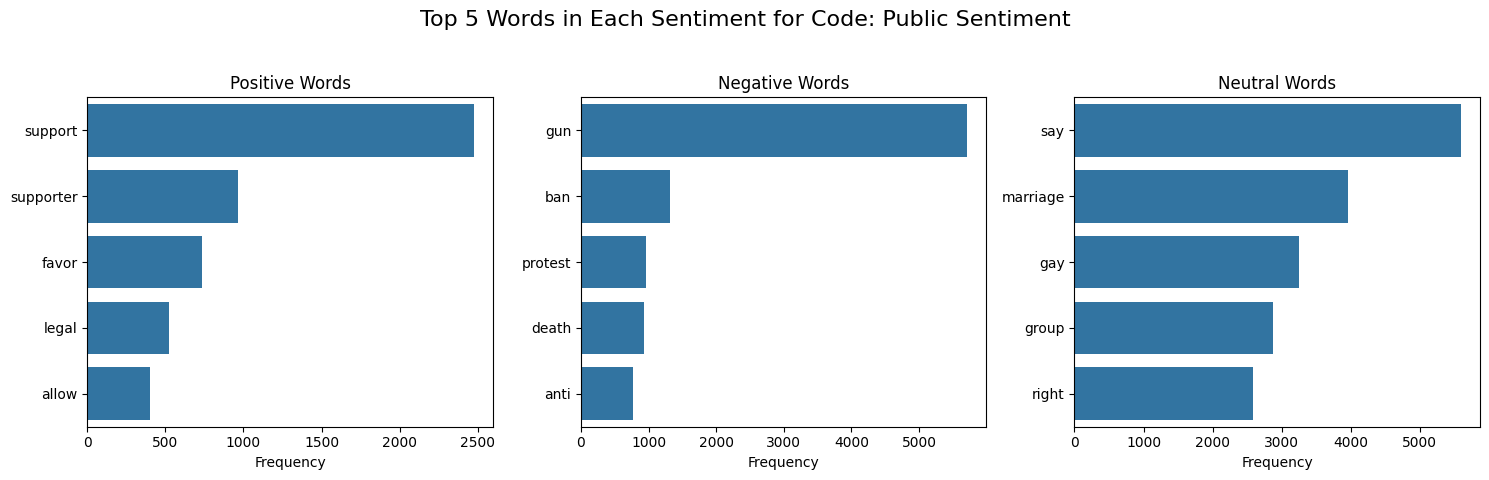

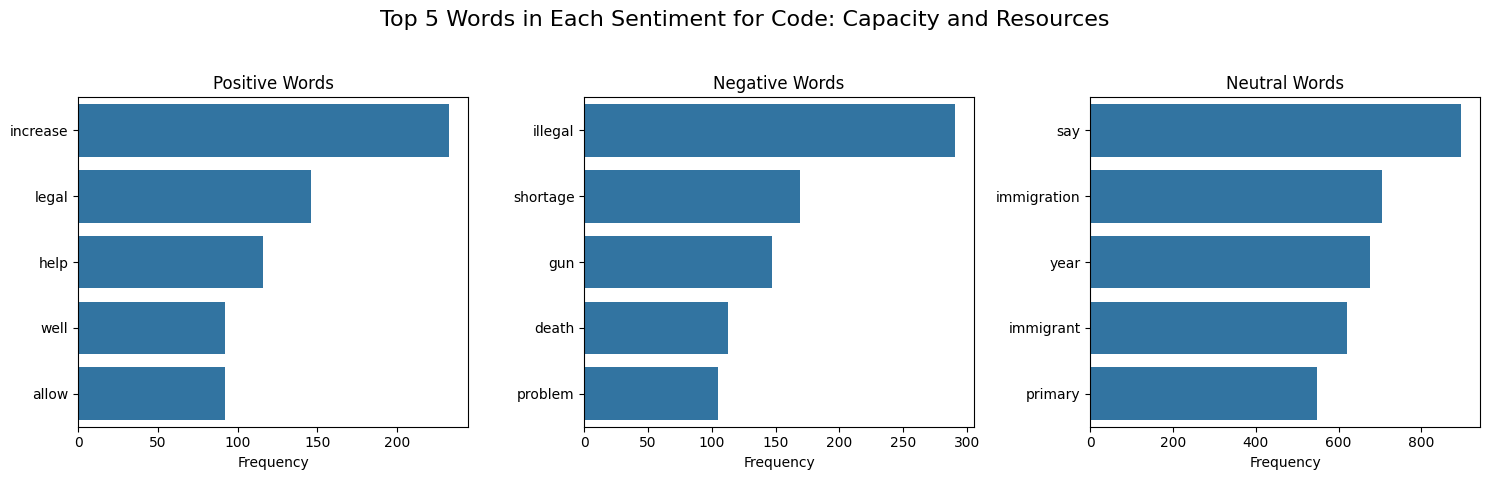

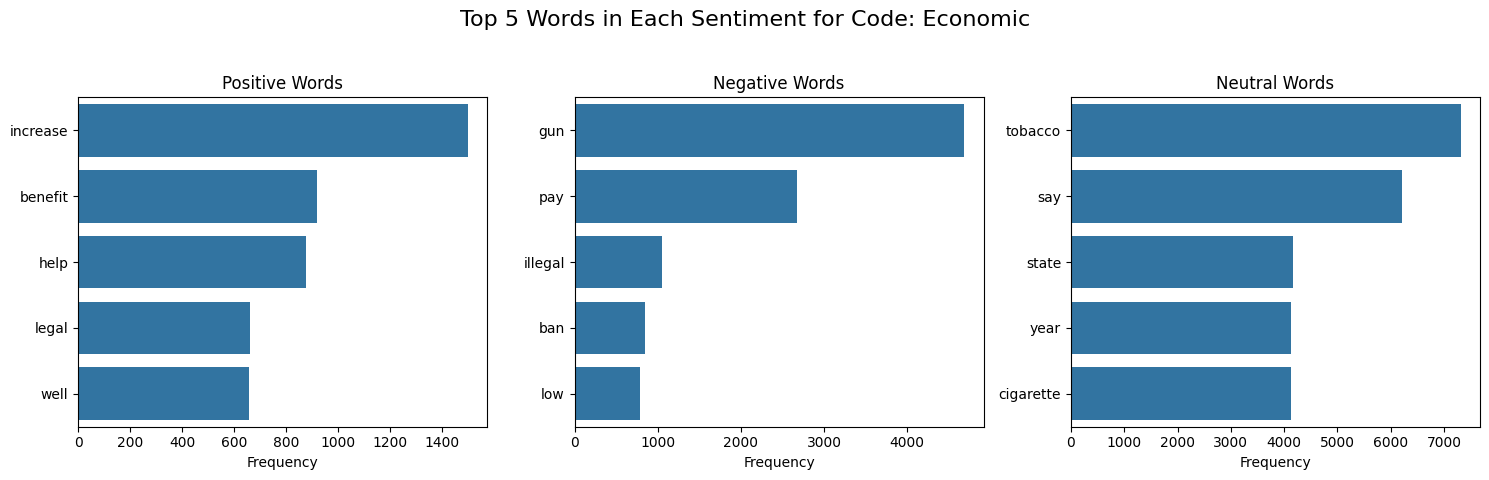

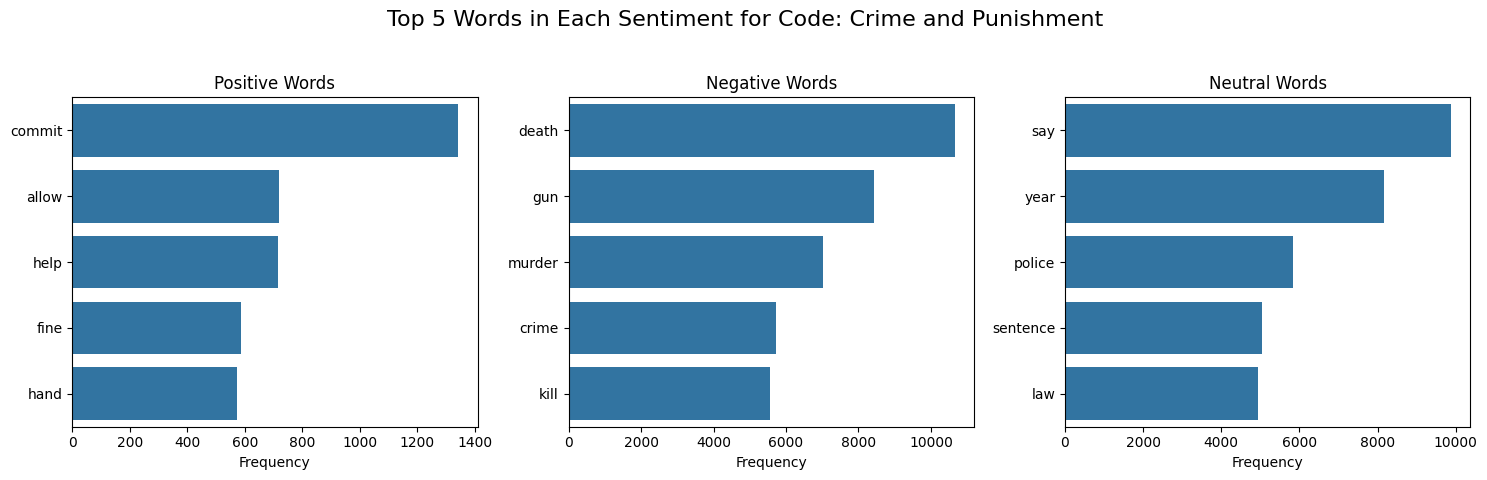

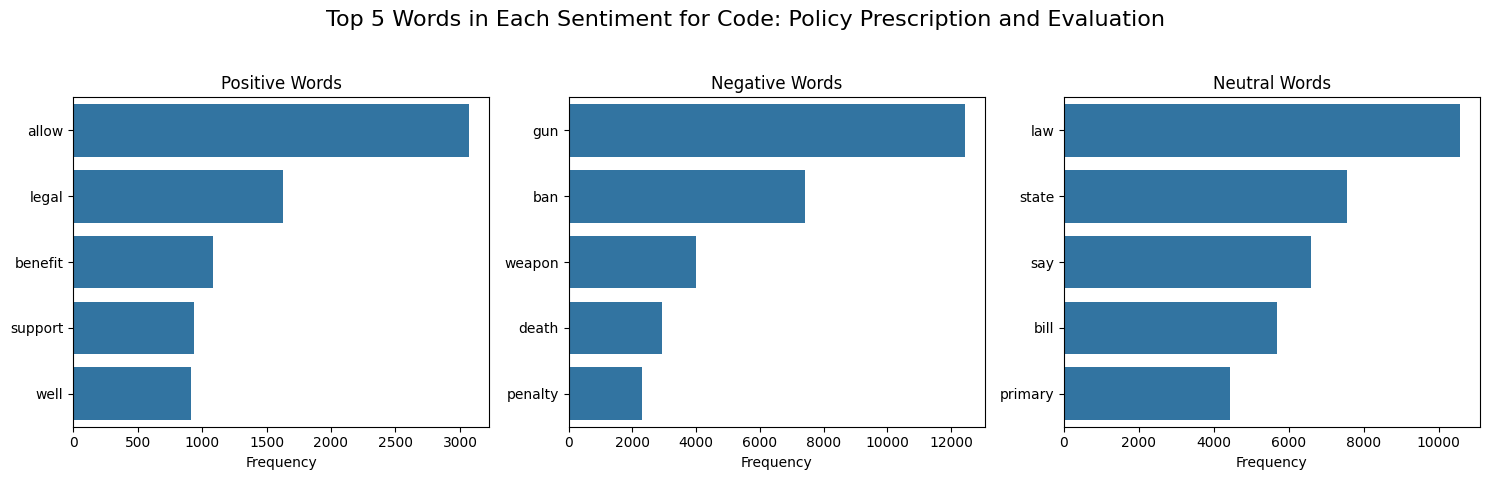

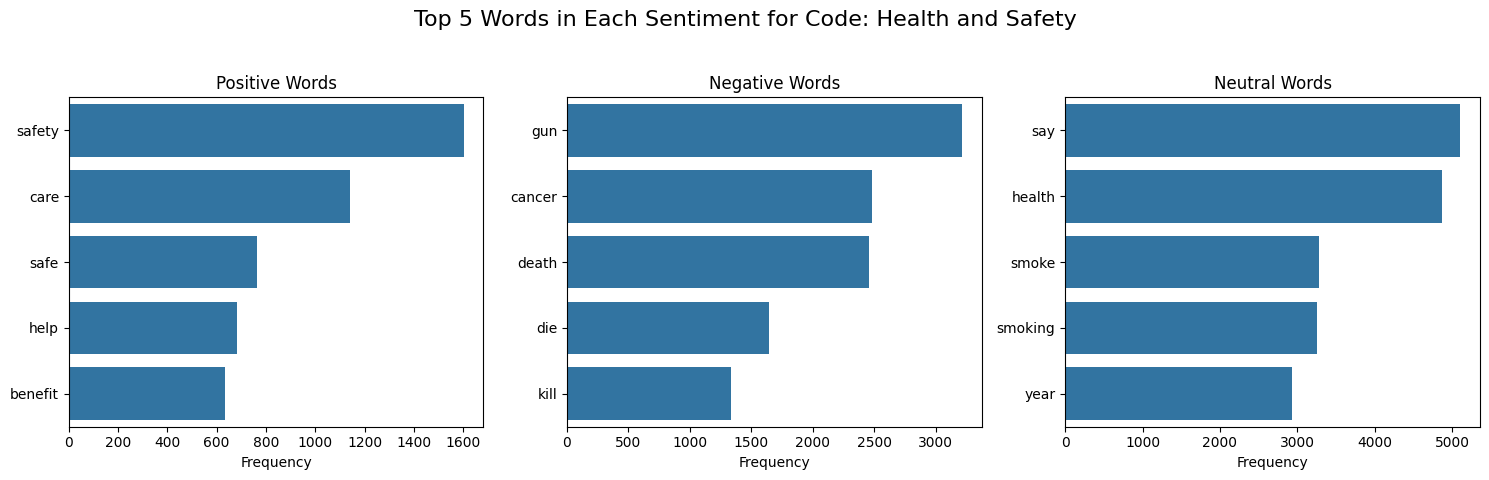

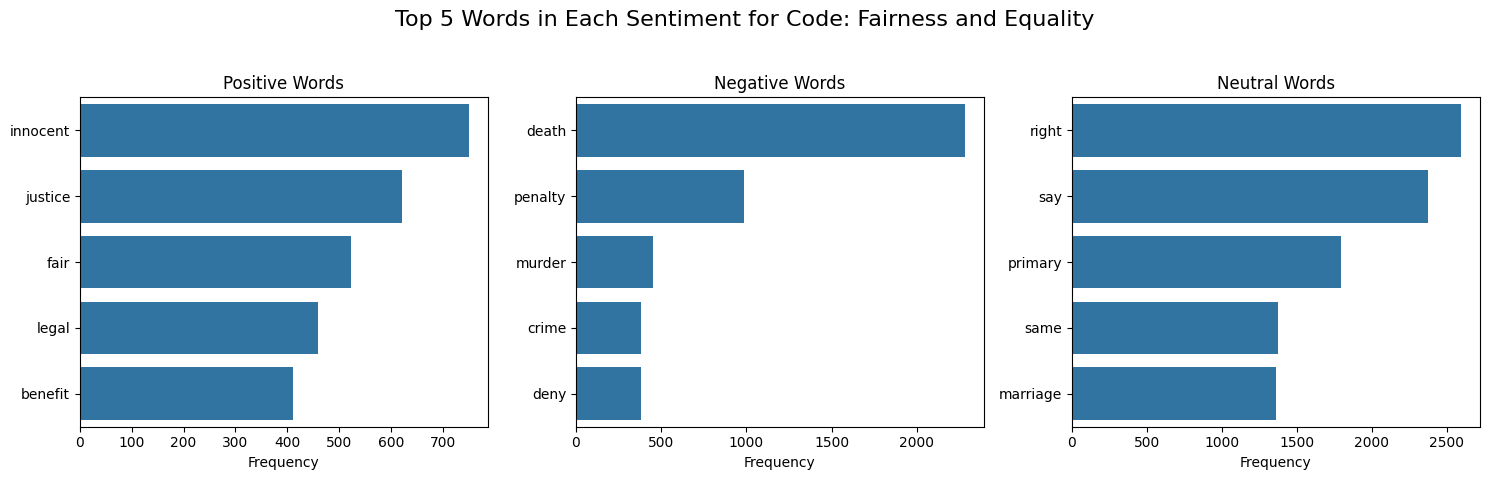

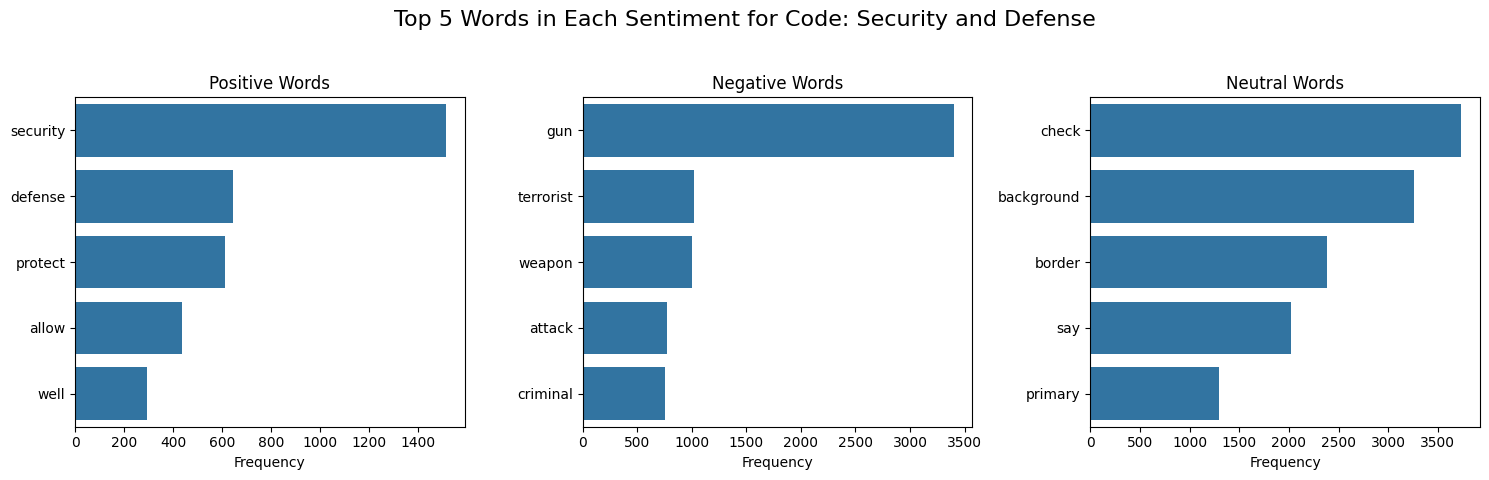

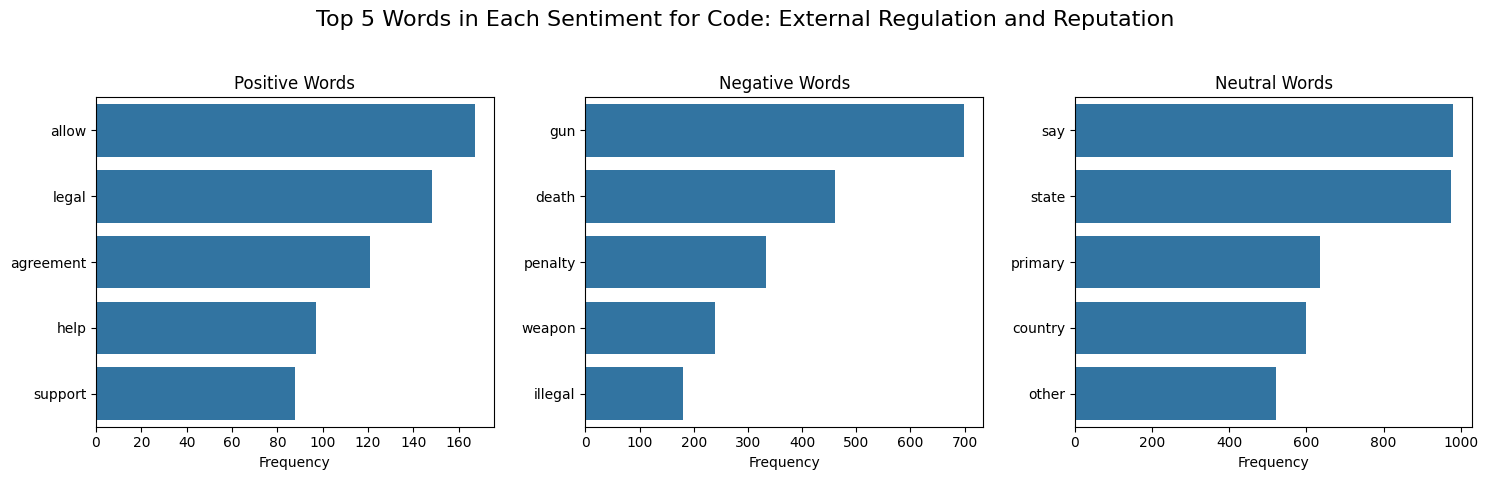

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming N is the number of top words you want to display
N = 5

for code, sentiments in tf.items():
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    code_name = codes[str(code) + ".0"]

    fig.suptitle(f'Top {N} Words in Each Sentiment for Code: {code_name}', fontsize=16)

    for i, (sentiment, words) in enumerate(sentiments.items()):
        # Get top N words
        top_words = dict(words.most_common(N))

        # Create DataFrame for easy plotting
        df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])
        
        # Plot
        sns.barplot(x='Frequency', y='Word', data=df, ax=axes[i])
        axes[i].set_title(f'{sentiment.capitalize()} Words')
        axes[i].set_xlabel('Frequency')
        axes[i].set_ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Show communities

In [42]:
!pip install networkx matplotlib python-louvain

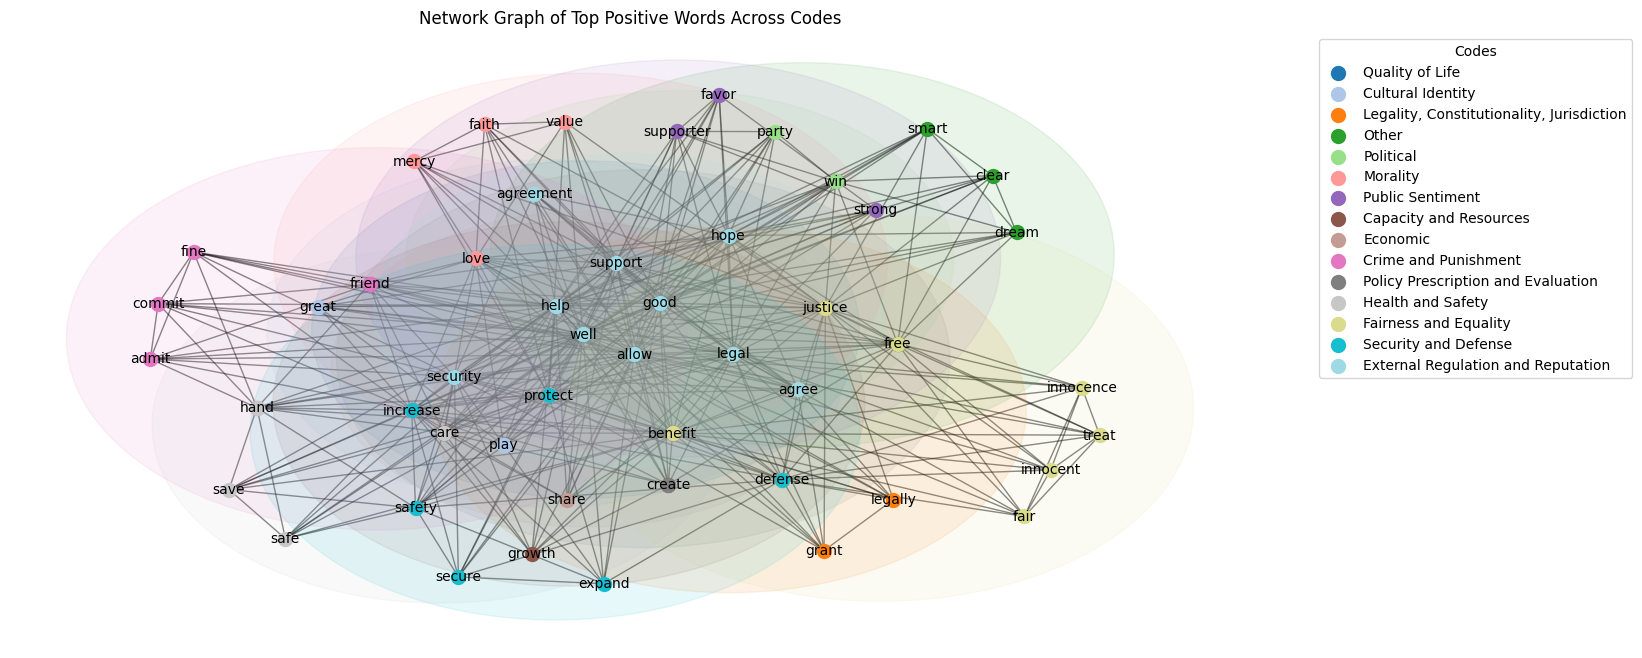

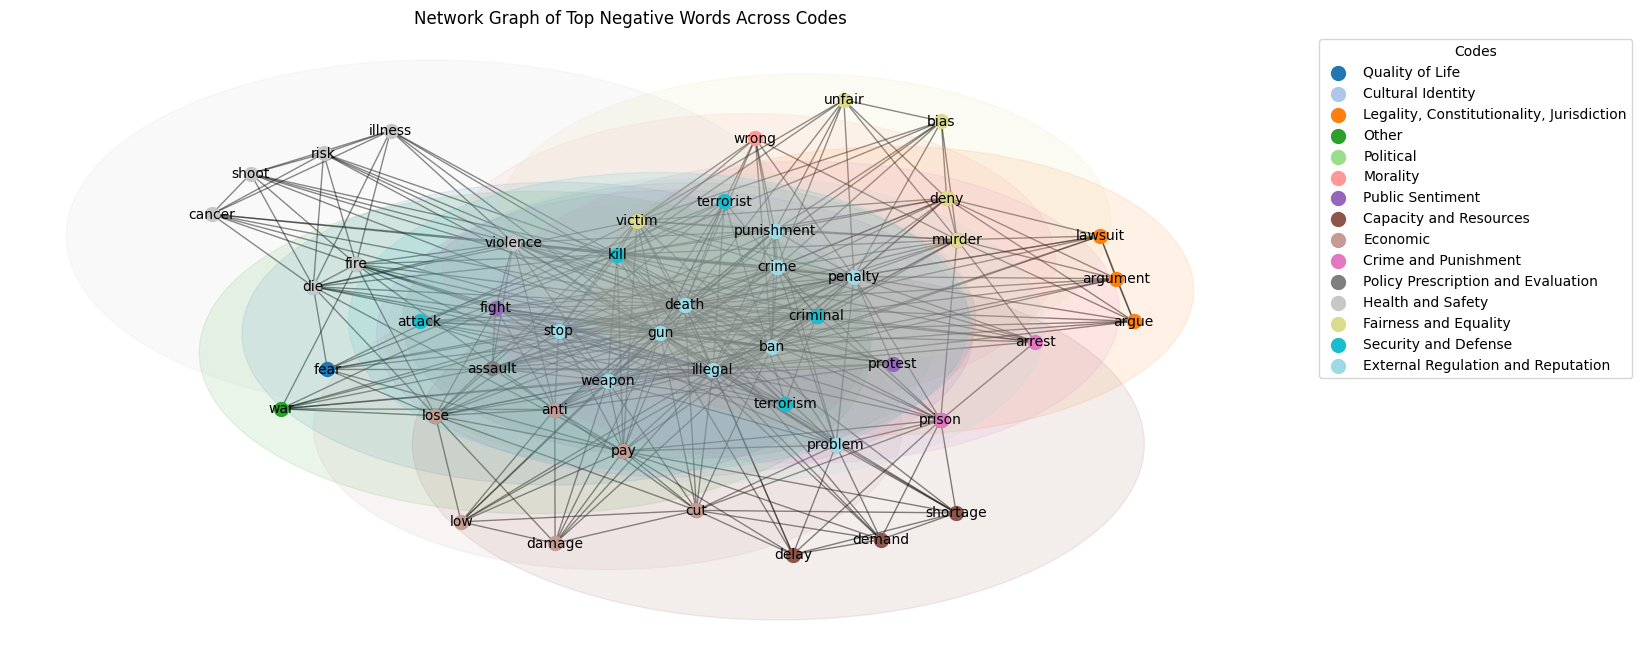

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import json
from itertools import combinations, chain
from collections import Counter
import numpy as np

# Define the top N words to consider for each code
N = 10

def draw_sentiment_graph(tf, sentiment):
    # Create a new graph for the sentiment
    G = nx.Graph()
    
    plt.figure(figsize=(16, 8))

    # Prepare a color map for different codes_color
    codes_color = list(tf.keys())
    colors = plt.cm.tab20(np.linspace(0, 1, len(codes_color)))

    # Assign a unique color to each code
    code_color_map = {code: colors[i] for i, code in enumerate(codes_color)}

    # Add nodes and edges from the tf dictionary
    for code, sentiments in tf.items():
        top_words = [word for word, freq in sentiments[sentiment].most_common(N)]
        G.add_nodes_from(top_words)
        
        # Only consider edges between words in the same frame
        for word1, word2 in combinations(top_words, 2):
            G.add_edge(word1, word2)

    # Calculate positions for all nodes in the graph
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Draw edges with a default color
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Draw nodes and community circles for each code
    for idx, (code, color) in enumerate(code_color_map.items()):
        top_words = [word for word, freq in tf[code][sentiment].most_common(N)]
        nx.draw_networkx_nodes(G, pos, nodelist=top_words, node_color=[color], label=codes[str(code) + ".0"], node_size=100)
        community_pos = np.array([pos[node] for node in top_words])
        center = community_pos.mean(axis=0)
        radius = np.linalg.norm(community_pos - center, axis=1).max() * 1.2
        circle = plt.Circle(center, radius, color=color, alpha=0.1)
        plt.gca().add_patch(circle)

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Create legend for codes
    plt.legend(title='Codes', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f"Network Graph of Top {sentiment.capitalize()} Words Across Codes")
    plt.axis('off')
    
    plt.show()

# Draw graphs for each sentiment
draw_sentiment_graph(tf, 'positive')
draw_sentiment_graph(tf, 'negative')

# Non-overlapping words

In [30]:
# words per code
words_per_code = {}
for code, sentiments in tf.items():
    words_per_code[code] = {}
    for sentiment, words in sentiments.items():
        words_per_code[code][sentiment] = len(list(words.keys()))

words_per_code

{'10': {'positive': 755, 'negative': 991, 'neutral': 12655},
 '11': {'positive': 803, 'negative': 1008, 'neutral': 15858},
 '5': {'positive': 762, 'negative': 1084, 'neutral': 17095},
 '15': {'positive': 218, 'negative': 230, 'neutral': 2458},
 '13': {'positive': 824, 'negative': 1147, 'neutral': 16340},
 '3': {'positive': 637, 'negative': 858, 'neutral': 8857},
 '12': {'positive': 656, 'negative': 882, 'neutral': 10550},
 '2': {'positive': 321, 'negative': 422, 'neutral': 4812},
 '1': {'positive': 651, 'negative': 809, 'neutral': 11827},
 '7': {'positive': 648, 'negative': 1000, 'neutral': 15554},
 '6': {'positive': 691, 'negative': 985, 'neutral': 12839},
 '9': {'positive': 603, 'negative': 926, 'neutral': 11506},
 '4': {'positive': 522, 'negative': 792, 'neutral': 7724},
 '8': {'positive': 471, 'negative': 672, 'neutral': 7235},
 '14': {'positive': 380, 'negative': 526, 'neutral': 4934}}

In [33]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

# File path to the GloVe file
glove_input_file = '../../data/glove/glove.6B.100d.txt'

# File path to the Word2Vec output file
word2vec_output_file = '../../data/glove/glove.6B.100d.txt.word2vec'

# Convert the GloVe file format to the Word2Vec file format
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the converted GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

C:\Users\elias\AppData\Local\Temp\ipykernel_19116\175860982.py:11: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [34]:
# Function to get GloVe vector for a word
def get_glove_vector(word, model):
    try:
        return model[word]
    except KeyError:
        return np.zeros(model.vector_size)

In [35]:
frames_description = {
    "Economic": "costs, benefits, or other financial implications",
    "Capacity and Resources": "availability of physical, human or financial resources, and capacity of current systems",
    "Morality": "religious or ethical implications",
    "Fairness and Equality": "balance or distribution of rights, responsibilities, and resources",
    "Legality, Constitutionality, Jurisdiction": "rights, freedoms, and authority of individuals, corporations, and government",
    "Policy Prescription and Evaluation": "discussion of specific policies aimed at addressing problems",
    "Crime and Punishment": "effectiveness and implications of laws and their enforcement",
    "Security and Defense": "threats to welfare of the individual, community, or nation",
    "Health and Safety": "health care, sanitation, public safety",
    "Quality of Life": "threats and opportunities for the individual’s wealth, happiness, and well-being",
    "Cultural Identity": "traditions, customs, or values of a social group in relation to a policy issue",
    "Public Sentiment": "attitudes and opinions of the general public, including polling and demographics",
    "Political": "considerations related to politics and politicians, including lobbying, elections, and attempts to sway voters",
    "External Regulation and Reputation": "international reputation or foreign policy of the U.S.",
    "Other": "any coherent group of frames not covered by the above categories"
}

# Option A 

Calculate frame vector by averaging the vectors of the frame descriptions

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

frame_vector = {}

# loop over frames_description
for frame, description in frames_description.items():
    # Tokenize and convert to lower case
    description_words = word_tokenize(description.lower())
    
    # Remove punctuation
    description_words = [word for word in description_words if word not in string.punctuation]

    # Remove stopwords and lemmatize
    description_words = [lemmatizer.lemmatize(word) for word in description_words if word not in stop_words]

    # calculate average vector use get_glove_vector
    description_vectors = [get_glove_vector(word, glove_model) for word in description_words]

    # calculate average vector
    description_vector = np.mean(description_vectors, axis=0)

    # add to frame_vector
    frame_vector[frame] = description_vector

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Option B

Calculate frame vector by averaging all words used in the frame

In [36]:
N = 10

frame_vector = {}

for code, sentiments in tf.items():
    for sentiment in sentiments:
        # Get top N words
        top_words = [word for word, freq in sentiments[sentiment].most_common(N)]

        # Get the GloVe vector for each word
        top_words_vectors = [get_glove_vector(word, glove_model) for word in top_words]

        # Calculate the average vector
        top_words_vector = np.mean(top_words_vectors, axis=0)

        frame_vector[codes[str(code) + ".0"]] = top_words_vector

# Filter

In [38]:
from scipy.spatial.distance import cosine

# Filter words occurring only once
for frame in tf.values():
    for sentiment in frame:
        frame[sentiment] = Counter({word: count for word, count in frame[sentiment].items() if count > 1})

tf_filtered = {}
for code, sentiments in tf.items():
    for sentiment, words in sentiments.items():
        frame_name = codes[str(code) + ".0"]

        for word in words:
            word_distance = cosine(get_glove_vector(word, glove_model), frame_vector[frame_name])

            # add to tf_filtered
            if code in tf_filtered:
                if sentiment in tf_filtered[code]:
                    tf_filtered[code][sentiment][word] = word_distance
                else:
                    tf_filtered[code][sentiment] = {word: word_distance}
            else:
                tf_filtered[code] = {sentiment: {word: word_distance}}

c:\Users\elias\anaconda3\envs\nlp310\lib\site-packages\scipy\spatial\distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [39]:
# Find the shortest distance for each word
shortest_distances = {}
for frame, sentiments in tf_filtered.items():
    for sentiment, words in sentiments.items():
        for word, distance in words.items():
            if word not in shortest_distances or distance < shortest_distances[word][1]:
                shortest_distances[word] = (frame, distance)

# Remove words from frames where they don't have the shortest distance
for frame, sentiments in tf_filtered.items():
    for sentiment, words in list(sentiments.items()):  # list() to make a copy of keys
        for word in list(words.keys()):  # list() to make a copy of keys
            if shortest_distances[word][0] != frame:
                del tf_filtered[frame][sentiment][word]


# Remove frames with distance smaller than 0.7
for frame, sentiments in list(tf_filtered.items()):  # list() to make a copy of keys
    for sentiment, words in list(sentiments.items()):  # list() to make a copy of keys
        for word in list(words.keys()):  # list() to make a copy of keys
            if words[word] < 0.7:
                del tf_filtered[frame][sentiment][word]

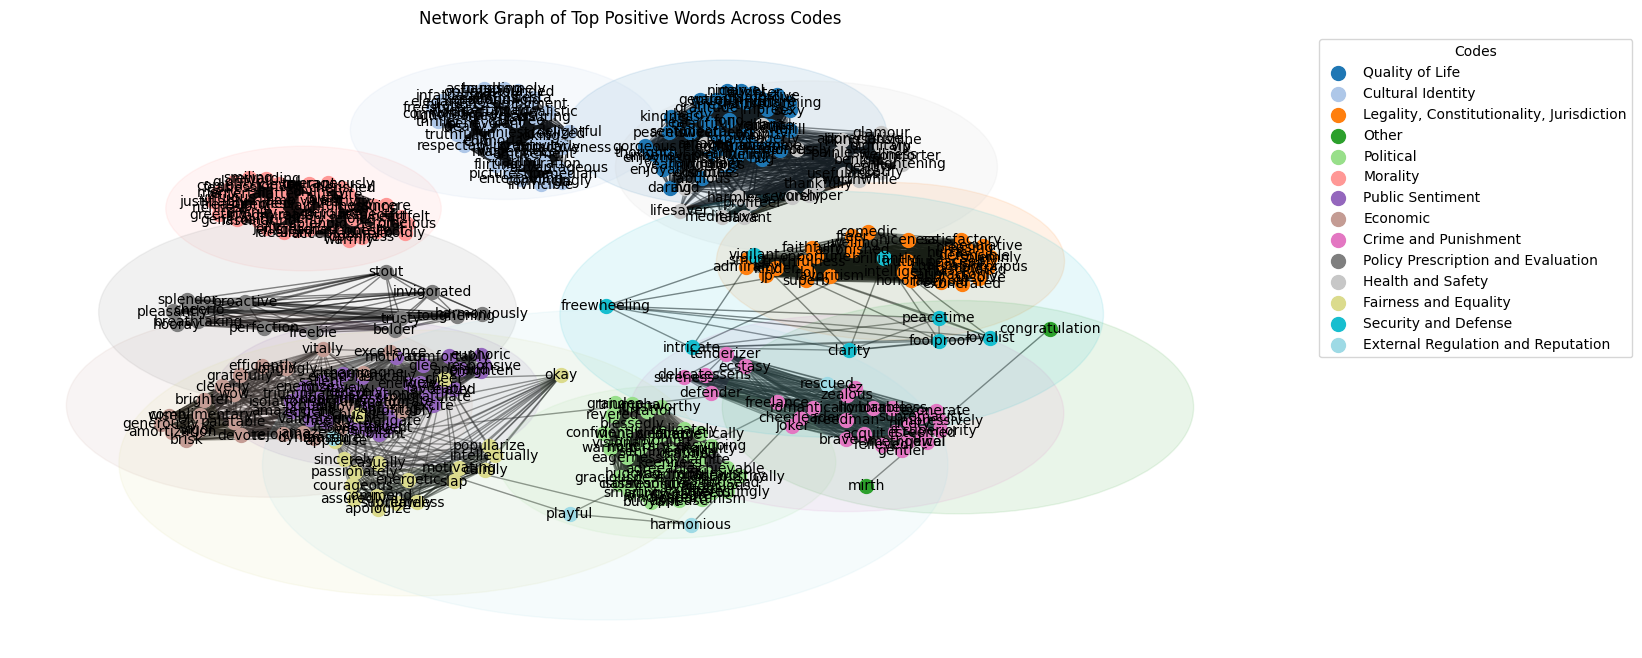

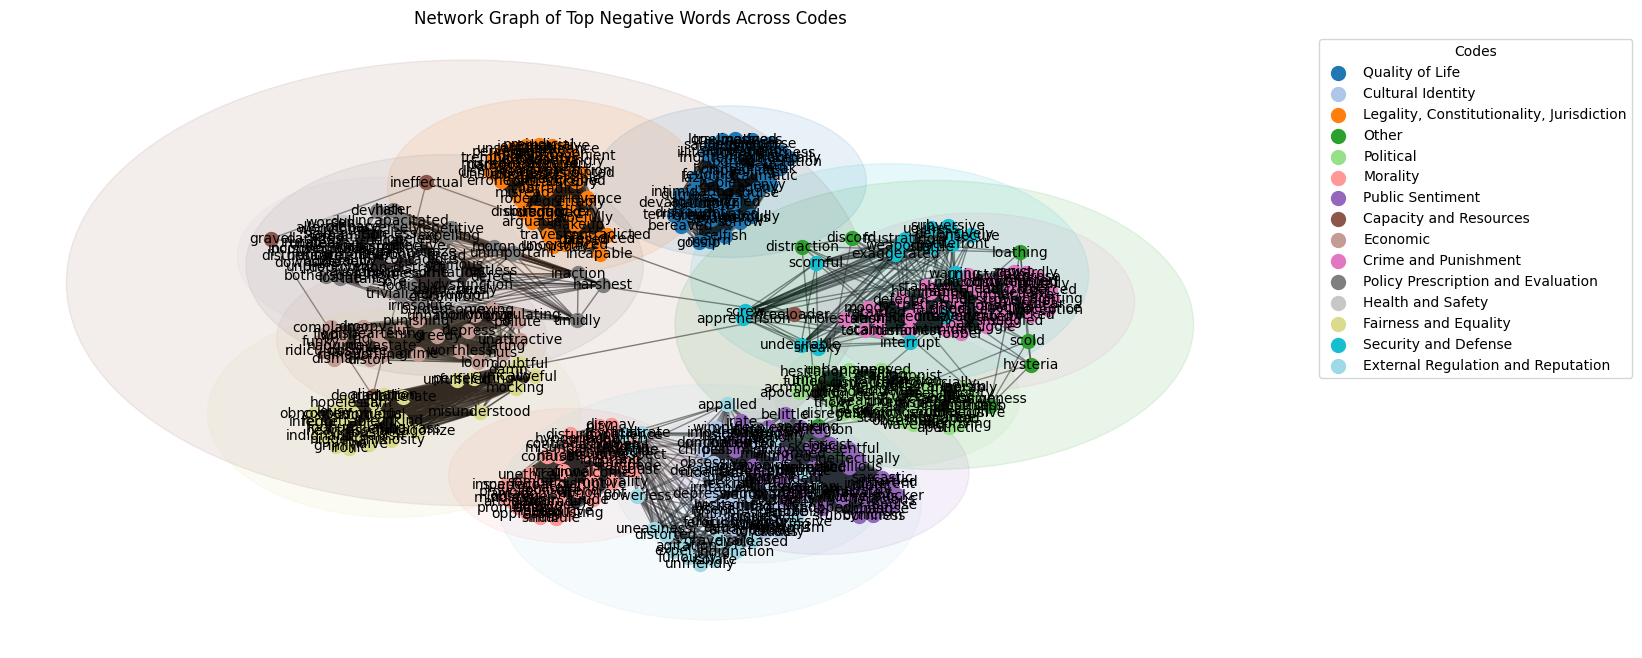

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

# Define the top N words to consider for each code
N = 50

# Function to draw sentiment graph
def draw_sentiment_graph_new(tf, sentiment):
    # Create a new graph for the sentiment
    G = nx.Graph()
    
    plt.figure(figsize=(16, 8))

    # Prepare a color map for different codes
    codes_color = list(tf.keys())
    colors = plt.cm.tab20(np.linspace(0, 1, len(codes_color)))

    # Assign a unique color to each code
    code_color_map = {code: colors[i] for i, code in enumerate(codes_color)}

    # Add nodes and edges from the tf dictionary
    for code, sentiments in tf.items():
        if sentiment in sentiments:
            # Sort words by their distance and take the top N
            top_words = sorted(sentiments[sentiment].items(), key=lambda x: x[1])[:N]
            top_words = [word for word, _ in top_words]
            G.add_nodes_from(top_words)
            
            # Only consider edges between words in the same frame
            for word1, word2 in combinations(top_words, 2):
                G.add_edge(word1, word2)

    # Calculate positions for all nodes in the graph
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Draw edges with a default color
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Draw nodes and community circles for each code
    for idx, (code, color) in enumerate(code_color_map.items()):
        if sentiment in tf[code]:
            top_words = sorted(tf[code][sentiment].items(), key=lambda x: x[1])[:N]
            top_words = [word for word, _ in top_words]
            if not top_words:
                continue  # Skip if there are no top words for this code
            nx.draw_networkx_nodes(G, pos, nodelist=top_words, node_color=[color], label=codes[str(code) + ".0"], node_size=100)
            
            community_pos = np.array([pos.get(node, np.zeros(2)) for node in top_words])
            if community_pos.shape[0] > 1:  # Check if there are enough points for a circle
                center = community_pos.mean(axis=0)
                radius = np.linalg.norm(community_pos - center, axis=1).max() * 1.2
                circle = plt.Circle(center, radius, color=color, alpha=0.1)
                plt.gca().add_patch(circle)


    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Create legend for codes
    plt.legend(title='Codes', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title(f"Network Graph of Top {sentiment.capitalize()} Words Across Codes")
    plt.axis('off')
    
    plt.show()

# Example usage
draw_sentiment_graph_new(tf_filtered, 'positive')
draw_sentiment_graph_new(tf_filtered, 'negative')


In [41]:
# find all occurences of word x
def find_all_occurences(word, tf_filtered):
    occurences = []
    for frame, sentiments in tf_filtered.items():
        for sentiment, words in sentiments.items():
            if word in words:
                occurences.append((frame, sentiment, words[word]))

    return occurences

# find all occurences of word x
find_all_occurences("snub", tf_filtered)

[('13', 'negative', 0.896337129175663)]

# Plot wordclouds

In [71]:
!pip install adjustText

  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/86/68/2514c33e8afcdfb41eef05580e3c8ddb0f7d1fde7fbc84c9d3bb43286d53/adjustText-1.0.4-py3-none-any.whl.metadata


C:\Users\elias\AppData\Local\Temp\ipykernel_19116\2195414453.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_frame_codes))


KeyError: '5'

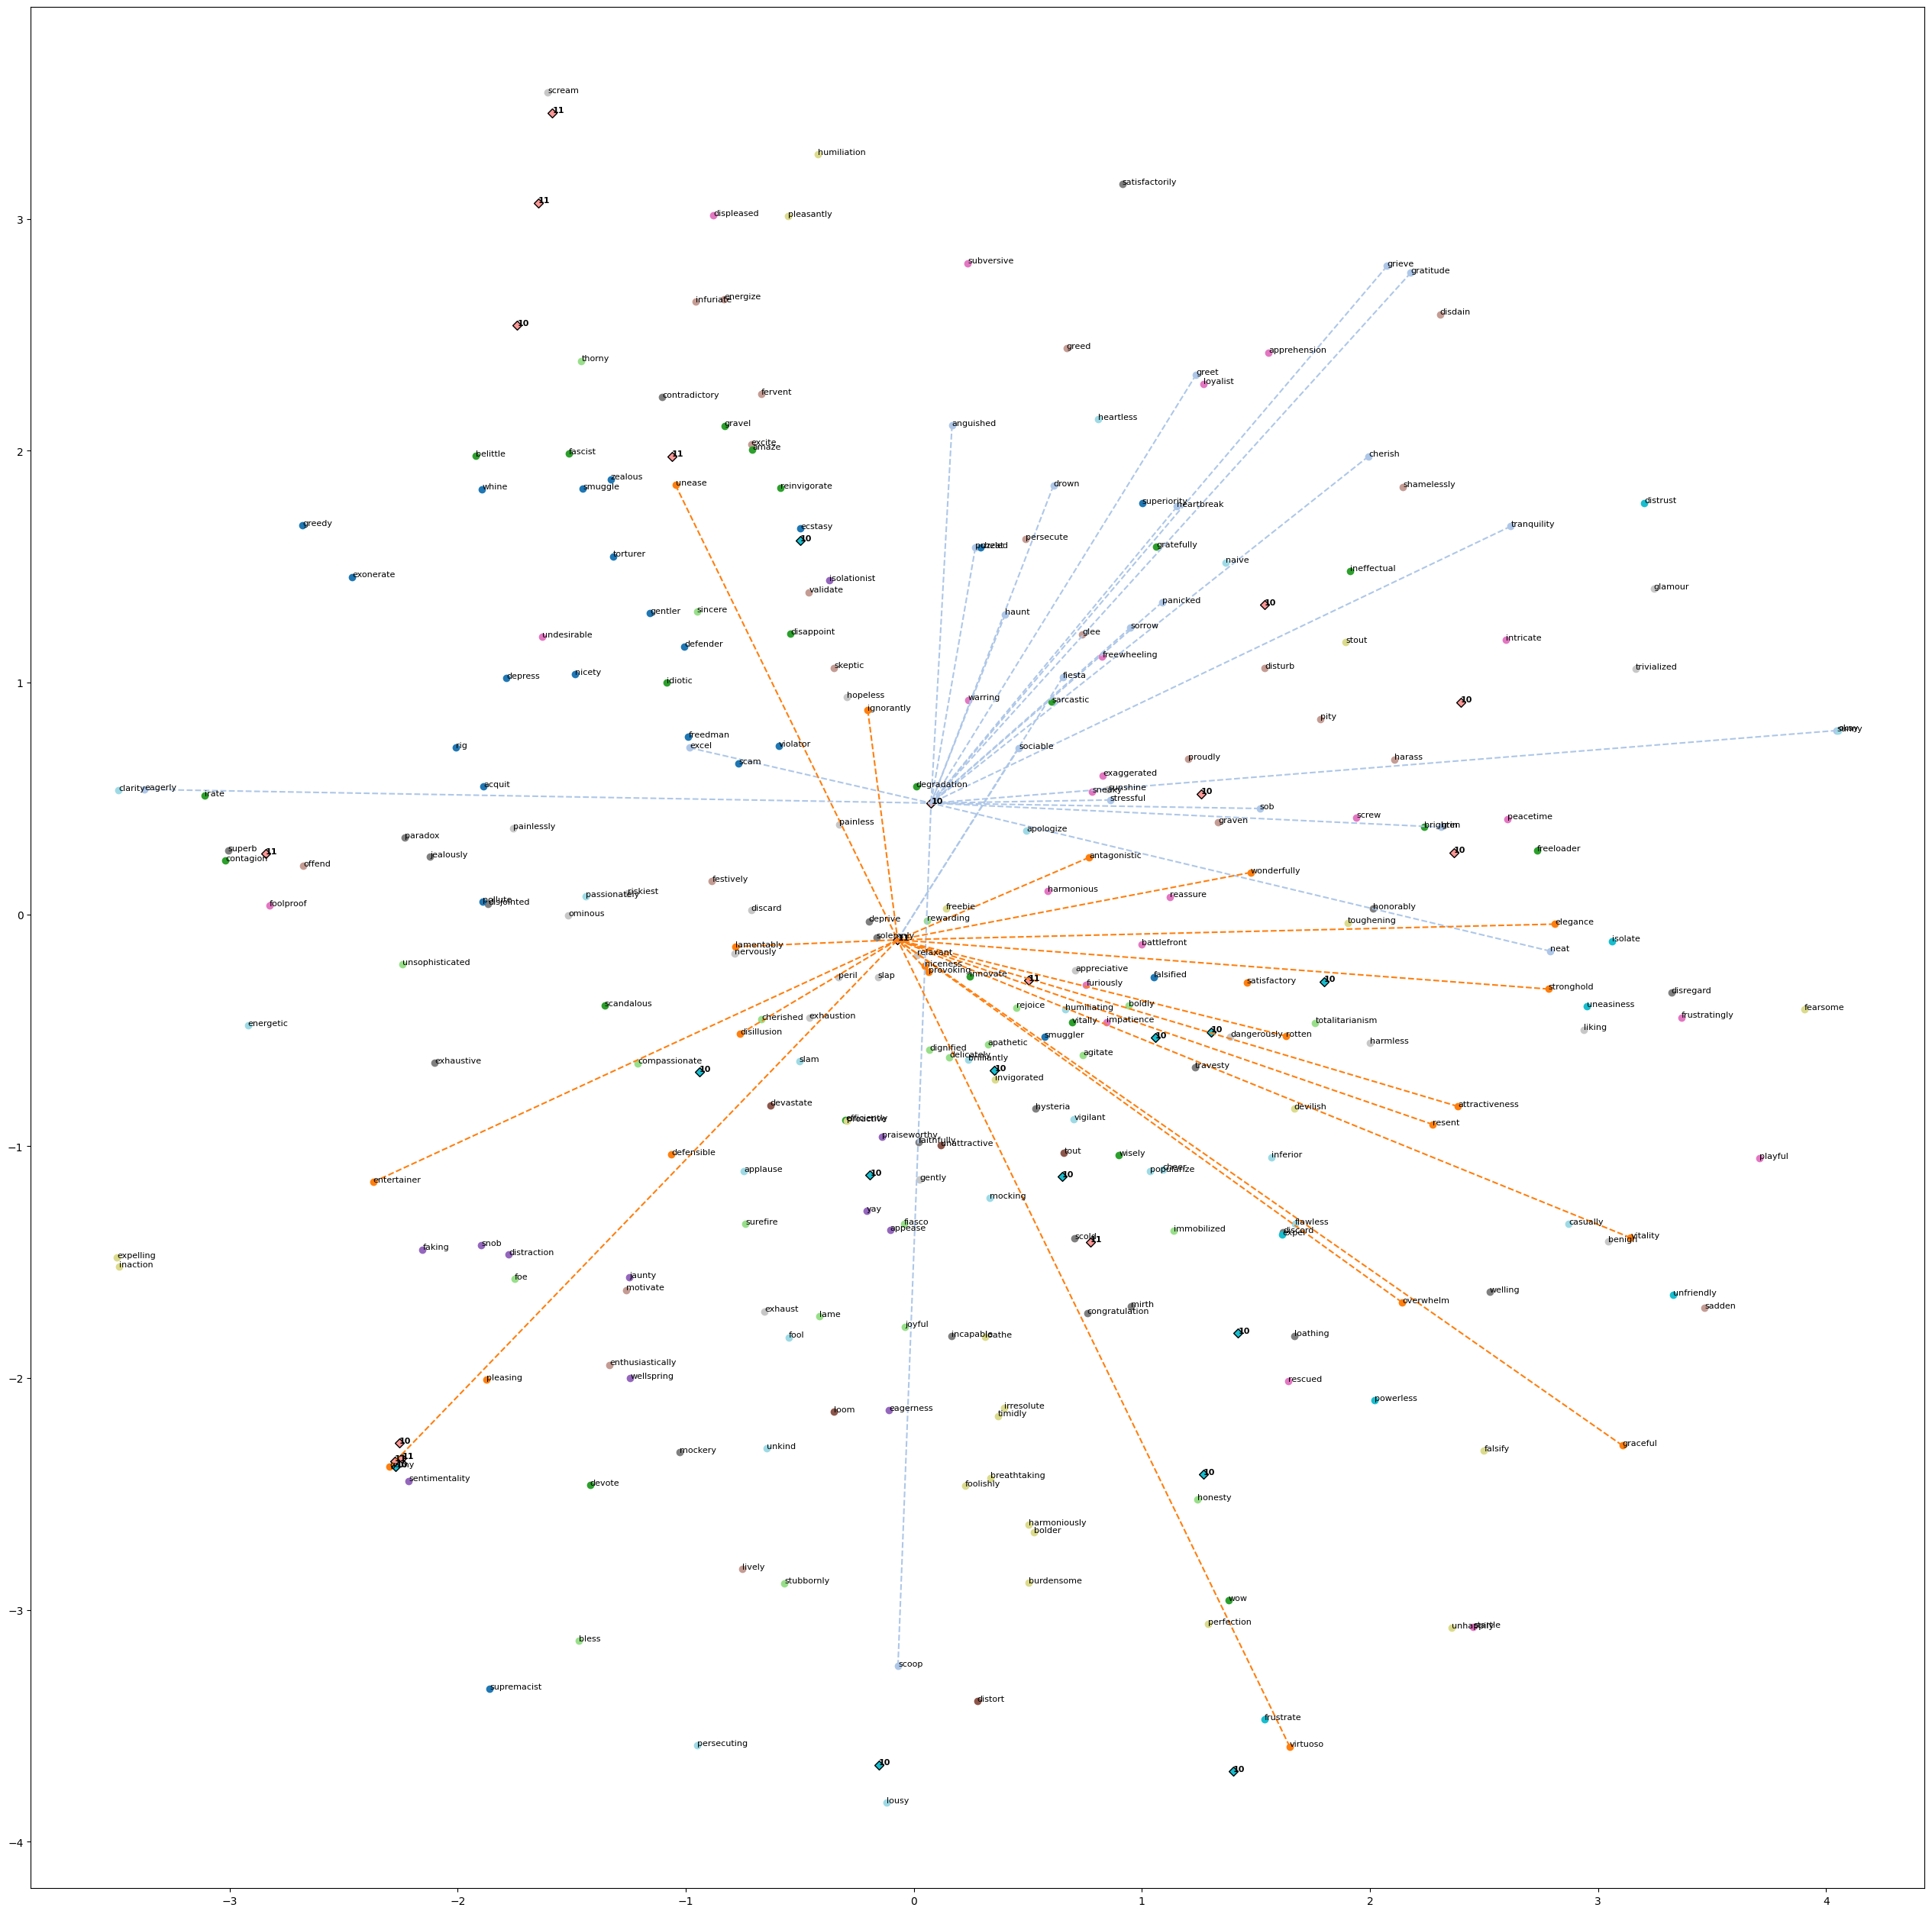

In [60]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from adjustText import adjust_text  # Ensure adjustText is installed

def plot_embedding_space(tf_filtered, passed_sentiments, glove_model):
    # Initialize lists for labels, tokens, and colors
    labels = []
    tokens = []
    colors = []
    frame_indices = []  # This will keep track of frame indices for color mapping
    frame_avg_vectors = {}  # To store average vectors for each frame
    frame_labels = []  # Labels for the frames
    frame_avg_coords = {}  # To store coordinates of average vectors
    word_coords = []  # To store coordinates of individual words

    # Generate a color map with unique colors for each frame
    unique_frame_codes = sorted(tf_filtered.keys())
    color_map = plt.cm.get_cmap('tab20', len(unique_frame_codes))
    
    # Assign colors using a mapping from frame code to color index
    frame_to_color_index = {frame_code: index for index, frame_code in enumerate(unique_frame_codes)}
    
    # Process each frame and word
    for frame_code, sentiments in tf_filtered.items():
        for sentiment in passed_sentiments:            
            frame_words = sentiments.get(sentiment, {})
            frame_vectors = []
            for word, _ in frame_words.items():
                if len(frame_vectors) >= 10:
                    break

                if word in glove_model:
                    vector = glove_model[word]
                    frame_vectors.append(vector)
                    tokens.append(vector)
                    labels.append(word)
                    frame_indices.append(frame_to_color_index[frame_code])  # Use the frame index for color
                    frame_labels.append(frame_code)  # Label for the word
                
            # Calculate and store the average vector for each frame
            if frame_vectors:
                avg_vector = np.mean(frame_vectors, axis=0)
                frame_avg_vectors[frame_code] = avg_vector
                tokens.append(avg_vector)  # Add the average vector to the tokens
                frame_indices.append(frame_to_color_index[frame_code])

    # Convert tokens to a NumPy array
    tokens_np = np.array(tokens)

    # Run t-SNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens_np)

    # Plotting
    plt.figure(figsize=(32, 32))
    texts = []
    for i, value in enumerate(new_values):
        color = color_map(frame_indices[i])  # Get color from color map using frame index
        if i < len(labels):  # For individual words
            plt.scatter(value[0], value[1], color=color)
            texts.append(plt.text(value[0], value[1], labels[i], fontsize=8))
            word_coords.append((value[0], value[1]))  # Store word coordinates
        else:  # For average vectors
            plt.scatter(value[0], value[1], color=color, edgecolors='black', marker='D')  # Diamond shape for average
            texts.append(plt.text(value[0], value[1], frame_labels[i - len(labels)], fontsize=8, weight='bold'))
            frame_avg_coords[frame_labels[i - len(labels)]] = (value[0], value[1])  # Store avg vector coordinates

    # Draw lines between words and corresponding average vectors
    for i, (word_x, word_y) in enumerate(word_coords):
        frame_label = frame_labels[i]
        avg_x, avg_y = frame_avg_coords[frame_label]
        plt.plot([word_x, avg_x], [word_y, avg_y], color=color_map(frame_indices[i]), linestyle='--')

    # Use adjustText to automatically adjust text positions
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red'))

    # Adding legend for frame indices
    for frame_code, index in frame_to_color_index.items():
        plt.scatter([], [], color=color_map(index), label=codes[str(frame_code) + ".0"])

    plt.legend(loc="best", title="Frame Codes", borderpad=1)
    plt.show()

# Example usage
plot_embedding_space(tf_filtered, ["positive", "negative"], glove_model)

# Find synonyms

In [201]:
import nltk
from nltk.corpus import wordnet

# Ensure NLTK is set up with WordNet
nltk.download('wordnet')

def find_synonyms(word):
    """Find synonyms and antonyms of a given word using NLTK's WordNet."""
    synonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())

    # Removing duplicates
    synonyms = list(set(synonyms))

    return synonyms

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [211]:
frame_words_with_synonyms_antonyms = {}

N = 10

# loop over each frame
for code, sentiment_words in frame_words.items():
    for sentiment, words in sentiment_words.items():
        # loop over each word in the sentiment
        for word in words[:N]:
            # find synonyms and antonyms
            synonyms = find_synonyms(word)

            # add to the dictionary
            if code in frame_words_with_synonyms_antonyms:
                if sentiment in frame_words_with_synonyms_antonyms[code]:
                    frame_words_with_synonyms_antonyms[code][sentiment].add(word)

                    # add synonyms
                    for synonym in synonyms:
                        frame_words_with_synonyms_antonyms[code][sentiment].add(synonym)
                else:
                    frame_words_with_synonyms_antonyms[code][sentiment] = set(word)

                    # add synonyms
                    for synonym in synonyms:
                        frame_words_with_synonyms_antonyms[code][sentiment].add(synonym)
            else:
                frame_words_with_synonyms_antonyms[code] = {}
                frame_words_with_synonyms_antonyms[code][sentiment] = set(word)

                # add synonyms
                for synonym in synonyms:
                    frame_words_with_synonyms_antonyms[code][sentiment].add(synonym)

In [212]:
frame_words_with_synonyms_antonyms

{10: {'positive': {'North_Korean_won',
   'South_Korean_won',
   'acquire',
   'advance',
   'advantageously',
   'affable',
   'amazing',
   'amiable',
   'assure',
   'awe-inspiring',
   'awesome',
   'awful',
   'awing',
   'bang',
   'batten',
   'batten_down',
   'be_intimate',
   'becharm',
   'bed',
   'beguile',
   'bewitch',
   'bonk',
   'bring_home_the_bacon',
   'c',
   'captivate',
   'capture',
   'catch',
   'charm',
   'charming',
   'come_through',
   'comfortably',
   'considerably',
   'cordial',
   'd',
   'deliver_the_goods',
   'do_it',
   'e',
   'easily',
   'eff',
   'enamor',
   'enamour',
   'enchant',
   'enjoy',
   'ensure',
   'entrance',
   'estimable',
   'ethical',
   'euphoric',
   'fascinate',
   'fasten',
   'fix',
   'fountainhead',
   'fuck',
   'gain',
   'gain_ground',
   'genial',
   'get_ahead',
   'get_it_on',
   'get_laid',
   'good',
   'guarantee',
   'have_a_go_at_it',
   'have_intercourse',
   'have_it_away',
   'have_it_off',
   'have_se

# Find antonyms (test)

In [259]:
for syn in wordnet.synsets("economical"):

    for l in syn.lemmas():
        print("+" + l.name())

        for ant in l.antonyms():
            print("-" + ant.name())
        

+economic
+economical
+economic
+economical
+economical
+frugal
+scotch
+sparing
+stinting
